# 1. 전처리 진행

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 불러오기
raw = pd.read_csv('../../final_프젝_데이터/서울시_침수흔적도.csv',encoding='utf-8-sig')
raw2 = pd.read_csv('../../final_프젝_데이터/등고선수치.csv',encoding='utf-8-sig')
raw3 = pd.read_csv('../../final_프젝_데이터/서울시_경사.csv',encoding='utf-8-sig')
raw4 = pd.read_csv('../../final_프젝_데이터/서울시_연속지적도.csv',encoding='utf-8-sig')
raw5 = pd.read_csv('../../final_프젝_데이터/하천거리.csv',encoding='utf-8-sig')
raw6 = pd.read_csv('../../final_프젝_데이터/하천면적.csv',encoding='utf-8-sig')

In [3]:
df = raw.copy()
df2 = raw2.copy()
df3 = raw3.copy()
df4 = raw4.copy()
df5 = raw5.copy()
df6 = raw6.copy()

In [4]:
df.head()

,자치구,침수수심,침수원인,침수평균해발고도,침수면적,행정코드,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,침수연도,침수지역정보,지오메트리
0,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,2022,주택,"POLYGON ((956425.1271956386 1963792.043624141,..."
1,강북구,0.02,2022년 8.8 ~17. 호우,118.05,2188.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 299-2,2022,주택,"POLYGON ((956590.6408143371 1963700.11134354, ..."
2,강북구,0.02,2022년 8.8 ~17. 호우,129.55,45287.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 산8-15,2022,주택,"POLYGON ((956383.2795007367 1963392.863235048,..."
3,영등포구,0.30,2022년 8.8 ~17. 호우,10.18,53.0,1156010400,20220808,20220810,20,24,내수침수,서울특별시 영등포구 영등포동3가 13-7,2022,상가,"POLYGON ((947842.214000747 1946702.945905377, ..."
4,강북구,0.02,2022년 8.8 ~17. 호우,75.48,105.0,1130510100,20220808,20220808,18,23,내수침수,서울특별시 강북구 미아동 258-241,2022,주택,"POLYGON ((958804.352649358 1958357.276617252, ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9724 entries, 0 to 9723
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   자치구       9724 non-null   object 
 1   침수수심      9724 non-null   float64
 2   침수원인      9724 non-null   object 
 3   침수평균해발고도  9724 non-null   float64
 4   침수면적      9724 non-null   float64
 5   행정코드      9724 non-null   int64  
 6   침수시작날짜    9724 non-null   int64  
 7   침수종료날짜    9724 non-null   object 
 8   침수시작시간    9724 non-null   int64  
 9   침수종료시간    9724 non-null   int64  
 10  침수내용      9724 non-null   object 
 11  주소        9724 non-null   object 
 12  침수연도      9724 non-null   int64  
 13  침수지역정보    8668 non-null   object 
 14  지오메트리     9724 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 1.1+ MB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13704 entries, 0 to 13703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UFID       13704 non-null  object 
 1   구분코드       13704 non-null  object 
 2   등고수치       13704 non-null  float64
 3   통합코드       13704 non-null  object 
 4   제작정보       13704 non-null  object 
 5   둘레_측정값(m)  13704 non-null  float64
dtypes: float64(2), object(4)
memory usage: 642.5+ KB


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899756 entries, 0 to 899755
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   법정동명     899756 non-null  object
 1   지번       899551 non-null  object
 2   기준년월     899756 non-null  object
 3   지형높이코드   899756 non-null  int64 
 4   지형높이     899756 non-null  object
 5   공시지가     899756 non-null  int64 
 6   데이터기준일자  899756 non-null  object
 7   구단위      899756 non-null  object
dtypes: int64(2), object(6)
memory usage: 54.9+ MB


In [8]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903481 entries, 0 to 903480
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   필지고유번호   903481 non-null  int64 
 1   지번       903481 non-null  object
 2   승인여부     903481 non-null  object
 3   원천도형ID   903481 non-null  int64 
 4   원천시군구코드  903481 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 34.5+ MB


In [9]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   행정동     426 non-null    object 
 1   구단위     426 non-null    object 
 2   하천_거리   426 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.1+ KB


In [10]:
df2.head()

,UFID,구분코드,등고수치,통합코드,제작정보,둘레_측정값(m)
0,1000037709008F00110000000000097632,주곡선,490.0,(볼록지)주곡선,2015001,753.868258
1,1000037709008F00110000000000097633,주곡선,480.0,(볼록지)주곡선,2015001,3409.613338
2,1000037709008F00110000000000097635,주곡선,465.0,(볼록지)주곡선,2015001,3875.317653
3,1000037709008F00110000000000097636,계곡선,475.0,(볼록지)계곡선,2015001,3571.586296
4,1000037709018F00110000000000097643,주곡선,470.0,(볼록지)주곡선,2015001,4500.693987


In [11]:
df3.head()

,법정동명,지번,기준년월,지형높이코드,지형높이,공시지가,데이터기준일자,구단위
0,서울특별시 종로구 청운동,1,2023-01,3,완경사,5320000,2024-01-23,종로구
1,서울특별시 종로구 청운동,1-1,2023-01,0,지정되지않음,1567000,2024-01-23,종로구
2,서울특별시 종로구 청운동,1-2,2023-01,4,급경사,2355000,2024-01-23,종로구
3,서울특별시 종로구 청운동,1-3,2023-01,3,완경사,5104000,2024-01-23,종로구
4,서울특별시 종로구 청운동,1-4,2023-01,0,지정되지않음,1828000,2024-01-23,종로구


In [12]:
df4.head()

,필지고유번호,지번,승인여부,원천도형ID,원천시군구코드
0,1111011000100770013,77-13대,1,161542,11110
1,1111011000100770014,77-14대,1,161543,11110
2,1111017400105950099,595-99 대,1,161544,11110
3,1111017400105950247,595-247 대,1,161545,11110
4,1111011000100020001,2-1대,1,161547,11110


In [13]:
df5.head()

,행정동,구단위,하천_거리
0,서울특별시 종로구 사직동,종로구,1177.805114
1,서울특별시 종로구 삼청동,종로구,2572.845770
2,서울특별시 종로구 부암동,종로구,487.130331
3,서울특별시 종로구 평창동,종로구,945.846607
4,서울특별시 종로구 무악동,종로구,2422.030461


In [14]:
df6.head()

,행정동,구단위,행정동_총_면적(km),행정동_하천면적(km),하천면적비율
0,서울특별시 종로구 사직동,종로구,1.859083,0.000000,0.000000
1,서울특별시 종로구 삼청동,종로구,2.171915,0.000000,0.000000
2,서울특별시 종로구 부암동,종로구,3.513782,0.023106,0.006576
3,서울특별시 종로구 평창동,종로구,14.395302,0.050816,0.003530
4,서울특별시 종로구 무악동,종로구,0.745724,0.000000,0.000000


In [15]:
print(df2.info())
print('-'*100)
print(df3.info())
print('-'*100)
print(df4.info())
print('-'*100)
print(df5.info())
print('-'*100)
print(df6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13704 entries, 0 to 13703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   UFID       13704 non-null  object 
 1   구분코드       13704 non-null  object 
 2   등고수치       13704 non-null  float64
 3   통합코드       13704 non-null  object 
 4   제작정보       13704 non-null  object 
 5   둘레_측정값(m)  13704 non-null  float64
dtypes: float64(2), object(4)
memory usage: 642.5+ KB
None
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899756 entries, 0 to 899755
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   법정동명     899756 non-null  object
 1   지번       899551 non-null  object
 2   기준년월     899756 non-null  object
 3   지형높이코드   899756 non-null  int64 
 4   지형높이     899756 non-null  object
 5   공시지가     899756 non-null  int64

In [16]:
df.describe()

,침수수심,침수평균해발고도,침수면적,행정코드,침수시작날짜,침수시작시간,침수종료시간,침수연도
count,9724.000000,9724.000000,9724.000000,9.724000e+03,9.724000e+03,9724.000000,9724.000000,9724.000000
mean,0.387828,21.063774,608.447735,1.155174e+09,2.021489e+07,13.608700,20.078568,2021.593069
std,0.209284,22.549690,2900.942130,1.068064e+07,1.832921e+05,8.125837,7.954268,1.197755
min,0.010000,3.370000,0.210000,1.111010e+09,2.180828e+06,0.000000,0.000000,2016.000000
25%,0.300000,12.300000,103.182500,1.154510e+09,2.022081e+07,1.000000,23.000000,2022.000000
50%,0.300000,16.300000,149.000000,1.156013e+09,2.022081e+07,18.000000,24.000000,2022.000000
75%,0.500000,23.860000,275.000000,1.162010e+09,2.022081e+07,20.000000,24.000000,2022.000000
max,1.800000,1341.660000,113020.000000,1.234568e+09,2.022123e+07,24.000000,24.000000,2022.000000


In [17]:
# 각 데이터 컬럼 통일화 (구단위로 통일)
df.rename(columns={'자치구':'구단위'}, inplace=True)

In [18]:
df.head()

,구단위,침수수심,침수원인,침수평균해발고도,침수면적,행정코드,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,침수연도,침수지역정보,지오메트리
0,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,2022,주택,"POLYGON ((956425.1271956386 1963792.043624141,..."
1,강북구,0.02,2022년 8.8 ~17. 호우,118.05,2188.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 299-2,2022,주택,"POLYGON ((956590.6408143371 1963700.11134354, ..."
2,강북구,0.02,2022년 8.8 ~17. 호우,129.55,45287.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 산8-15,2022,주택,"POLYGON ((956383.2795007367 1963392.863235048,..."
3,영등포구,0.30,2022년 8.8 ~17. 호우,10.18,53.0,1156010400,20220808,20220810,20,24,내수침수,서울특별시 영등포구 영등포동3가 13-7,2022,상가,"POLYGON ((947842.214000747 1946702.945905377, ..."
4,강북구,0.02,2022년 8.8 ~17. 호우,75.48,105.0,1130510100,20220808,20220808,18,23,내수침수,서울특별시 강북구 미아동 258-241,2022,주택,"POLYGON ((958804.352649358 1958357.276617252, ..."


In [19]:
# df3 필요없는 컬럼 정리
df3.head()
# 기준년월, 공시지가, 데이터기준일자 필요없음

,법정동명,지번,기준년월,지형높이코드,지형높이,공시지가,데이터기준일자,구단위
0,서울특별시 종로구 청운동,1,2023-01,3,완경사,5320000,2024-01-23,종로구
1,서울특별시 종로구 청운동,1-1,2023-01,0,지정되지않음,1567000,2024-01-23,종로구
2,서울특별시 종로구 청운동,1-2,2023-01,4,급경사,2355000,2024-01-23,종로구
3,서울특별시 종로구 청운동,1-3,2023-01,3,완경사,5104000,2024-01-23,종로구
4,서울특별시 종로구 청운동,1-4,2023-01,0,지정되지않음,1828000,2024-01-23,종로구


In [20]:
# df3 유지할 컬럼 리스트
keep_columns = [
    '법정동명', '지형높이코드',
    '지형높이', '구단위'
]

# 데이터프레임에서 유지할 컬럼만 선택
df3 = df3[keep_columns]

In [21]:
# 결과 확인
df3.head()

,법정동명,지형높이코드,지형높이,구단위
0,서울특별시 종로구 청운동,3,완경사,종로구
1,서울특별시 종로구 청운동,0,지정되지않음,종로구
2,서울특별시 종로구 청운동,4,급경사,종로구
3,서울특별시 종로구 청운동,3,완경사,종로구
4,서울특별시 종로구 청운동,0,지정되지않음,종로구


In [22]:
# 컬럼 위치 변경 함수
def move_column(df, col_name, new_index):
    cols = list(df.columns)
    cols.insert(new_index, cols.pop(cols.index(col_name)))
    return df[cols]

df3 = move_column(df3, '구단위', 0)

In [23]:
df3.head()

,구단위,법정동명,지형높이코드,지형높이
0,종로구,서울특별시 종로구 청운동,3,완경사
1,종로구,서울특별시 종로구 청운동,0,지정되지않음
2,종로구,서울특별시 종로구 청운동,4,급경사
3,종로구,서울특별시 종로구 청운동,3,완경사
4,종로구,서울특별시 종로구 청운동,0,지정되지않음


In [24]:
df.head()

,구단위,침수수심,침수원인,침수평균해발고도,침수면적,행정코드,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,침수연도,침수지역정보,지오메트리
0,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,2022,주택,"POLYGON ((956425.1271956386 1963792.043624141,..."
1,강북구,0.02,2022년 8.8 ~17. 호우,118.05,2188.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 299-2,2022,주택,"POLYGON ((956590.6408143371 1963700.11134354, ..."
2,강북구,0.02,2022년 8.8 ~17. 호우,129.55,45287.0,1130510400,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 산8-15,2022,주택,"POLYGON ((956383.2795007367 1963392.863235048,..."
3,영등포구,0.30,2022년 8.8 ~17. 호우,10.18,53.0,1156010400,20220808,20220810,20,24,내수침수,서울특별시 영등포구 영등포동3가 13-7,2022,상가,"POLYGON ((947842.214000747 1946702.945905377, ..."
4,강북구,0.02,2022년 8.8 ~17. 호우,75.48,105.0,1130510100,20220808,20220808,18,23,내수침수,서울특별시 강북구 미아동 258-241,2022,주택,"POLYGON ((958804.352649358 1958357.276617252, ..."


In [25]:
# df 유지할 컬럼 리스트
keep_columns = [
    '구단위', '침수수심', '침수원인',
    '침수평균해발고도', '침수면적', 
    '침수시작날짜', '침수종료날짜', 
    '침수시작시간', '침수종료시간',
    '침수내용', '주소', 
    '행정코드', 
    '침수연도'
    
]

# 데이터프레임에서 유지할 컬럼만 선택
df = df[keep_columns]

In [26]:
df.head()

,구단위,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,행정코드,침수연도
0,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,1130510400,2022
1,강북구,0.02,2022년 8.8 ~17. 호우,118.05,2188.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 299-2,1130510400,2022
2,강북구,0.02,2022년 8.8 ~17. 호우,129.55,45287.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 산8-15,1130510400,2022
3,영등포구,0.30,2022년 8.8 ~17. 호우,10.18,53.0,20220808,20220810,20,24,내수침수,서울특별시 영등포구 영등포동3가 13-7,1156010400,2022
4,강북구,0.02,2022년 8.8 ~17. 호우,75.48,105.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 미아동 258-241,1130510100,2022


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9724 entries, 0 to 9723
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구단위       9724 non-null   object 
 1   침수수심      9724 non-null   float64
 2   침수원인      9724 non-null   object 
 3   침수평균해발고도  9724 non-null   float64
 4   침수면적      9724 non-null   float64
 5   침수시작날짜    9724 non-null   int64  
 6   침수종료날짜    9724 non-null   object 
 7   침수시작시간    9724 non-null   int64  
 8   침수종료시간    9724 non-null   int64  
 9   침수내용      9724 non-null   object 
 10  주소        9724 non-null   object 
 11  행정코드      9724 non-null   int64  
 12  침수연도      9724 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 987.7+ KB


In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899756 entries, 0 to 899755
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구단위     899756 non-null  object
 1   법정동명    899756 non-null  object
 2   지형높이코드  899756 non-null  int64 
 3   지형높이    899756 non-null  object
dtypes: int64(1), object(3)
memory usage: 27.5+ MB


In [29]:
df3.head()

,구단위,법정동명,지형높이코드,지형높이
0,종로구,서울특별시 종로구 청운동,3,완경사
1,종로구,서울특별시 종로구 청운동,0,지정되지않음
2,종로구,서울특별시 종로구 청운동,4,급경사
3,종로구,서울특별시 종로구 청운동,3,완경사
4,종로구,서울특별시 종로구 청운동,0,지정되지않음


In [30]:
# 2016년 1월 1일 ~ 2017년 12월 31일 사이의 데이터 제거
df = df[(df['침수시작날짜'] < 20160101) | (df['침수시작날짜'] >= 20180101)]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9682 entries, 0 to 9681
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구단위       9682 non-null   object 
 1   침수수심      9682 non-null   float64
 2   침수원인      9682 non-null   object 
 3   침수평균해발고도  9682 non-null   float64
 4   침수면적      9682 non-null   float64
 5   침수시작날짜    9682 non-null   int64  
 6   침수종료날짜    9682 non-null   object 
 7   침수시작시간    9682 non-null   int64  
 8   침수종료시간    9682 non-null   int64  
 9   침수내용      9682 non-null   object 
 10  주소        9682 non-null   object 
 11  행정코드      9682 non-null   int64  
 12  침수연도      9682 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.0+ MB


In [32]:
# txt 파일 불러오기
file_path = '../../final_프젝_데이터/법정동코드 전체자료.txt'

In [33]:
# 파일 읽기
with open(file_path, 'r', encoding='euc-kr') as file:
    lines = file.readlines()

In [34]:
# 딕셔너리 생성
seoul_districts = {}

In [35]:
# 전처리
for line in lines:
    parts = line.strip().split('\t')
    if len(parts) == 3 and parts[2] == '존재' and '서울특별시' in parts[1] and parts[1] != '서울특별시':
        seoul_districts[parts[1]] = int(parts[0])

In [36]:
# df3에 행정코드 추가
df3['행정코드'] = df3['법정동명'].map(seoul_districts)

In [37]:
# NaN 값이 있는지 확인
nan_rows = df3[df3['행정코드'].isna()]
print("NaN 값이 있는 행정동명:")
print(nan_rows['법정동명'].unique())

NaN 값이 있는 행정동명:
['서울특별시 강동구 명일동 ' '서울특별시 강동구 고덕동 ' '서울특별시 강동구 상일동 ' '서울특별시 강동구 길동 '
 '서울특별시 강동구 둔촌동 ' '서울특별시 강동구 암사동 ' '서울특별시 강동구 성내동 ' '서울특별시 강동구 천호동 '
 '서울특별시 강동구 강일동 ']


In [38]:
# NaN 값인 행정동명 수동으로 추가 
manual_additions = {
    '서울특별시 강동구 명일동 ':'1174010100', 
    '서울특별시 강동구 고덕동 ':'1174010200',
    '서울특별시 강동구 상일동 ':'1174010300',
    '서울특별시 강동구 길동 ':'1174010500',
 '서울특별시 강동구 둔촌동 ':'1174010600',
 '서울특별시 강동구 암사동 ':'1174010700',
 '서울특별시 강동구 성내동 ':'1174010800',
 '서울특별시 강동구 천호동 ':'1174010900',
 '서울특별시 강동구 강일동 ':'1174010900'
}

In [39]:
# 수동으로 추가한 값을 딕셔너리에 반영
seoul_districts.update(manual_additions)

In [40]:
# 다시 행정코드 매핑
df3['행정코드'] = df3['법정동명'].map(seoul_districts)

In [41]:
# NaN 값이 있는지 확인
nan_rows = df3[df3['행정코드'].isna()]
print("NaN 값이 있는 행정동명:")
print(nan_rows['법정동명'].unique())

NaN 값이 있는 행정동명:
[]


In [42]:
# 행정코드 타입을 int로 변환 (NaN 값이 없을 경우에만)
nan_rows = df3[df3['행정코드'].isna()]
if nan_rows.empty:
    df3['행정코드'] = df3['행정코드'].astype(int)

In [43]:
print(df.info())
print('-'*100)
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9682 entries, 0 to 9681
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구단위       9682 non-null   object 
 1   침수수심      9682 non-null   float64
 2   침수원인      9682 non-null   object 
 3   침수평균해발고도  9682 non-null   float64
 4   침수면적      9682 non-null   float64
 5   침수시작날짜    9682 non-null   int64  
 6   침수종료날짜    9682 non-null   object 
 7   침수시작시간    9682 non-null   int64  
 8   침수종료시간    9682 non-null   int64  
 9   침수내용      9682 non-null   object 
 10  주소        9682 non-null   object 
 11  행정코드      9682 non-null   int64  
 12  침수연도      9682 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.0+ MB
None
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899756 entries, 0 to 899755
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype

In [44]:
# 병합 전에 각 데이터프레임에서 행정코드 중복 확인
print("df 행정코드 중복 수:", df['행정코드'].duplicated().sum())
print("df3 행정코드 중복 수:", df3['행정코드'].duplicated().sum())

df 행정코드 중복 수: 9468
df3 행정코드 중복 수: 899290


In [45]:
# 행정코드를 기준으로 첫 번째 일치하는 행 선택
df3_unique = df3.drop_duplicates(subset=['행정코드'])


In [46]:
# 병합
merged_df = pd.merge(df, df3_unique, on='행정코드', how='left')

In [47]:
# '구단위_x' 컬럼을 남기고 '구단위_y' 컬럼 제거
merged_df.drop(columns=['구단위_y'], inplace=True)

# '구단위_x' 컬럼 이름을 '구단위'로 변경
merged_df.rename(columns={'구단위_x': '구단위'}, inplace=True)

In [48]:
# 결과 확인
print("병합 후 데이터 행 수:", len(merged_df))
print(merged_df.info())

병합 후 데이터 행 수: 9682
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9682 entries, 0 to 9681
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구단위       9682 non-null   object 
 1   침수수심      9682 non-null   float64
 2   침수원인      9682 non-null   object 
 3   침수평균해발고도  9682 non-null   float64
 4   침수면적      9682 non-null   float64
 5   침수시작날짜    9682 non-null   int64  
 6   침수종료날짜    9682 non-null   object 
 7   침수시작시간    9682 non-null   int64  
 8   침수종료시간    9682 non-null   int64  
 9   침수내용      9682 non-null   object 
 10  주소        9682 non-null   object 
 11  행정코드      9682 non-null   int64  
 12  침수연도      9682 non-null   int64  
 13  법정동명      9680 non-null   object 
 14  지형높이코드    9680 non-null   float64
 15  지형높이      9680 non-null   object 
dtypes: float64(4), int64(5), object(7)
memory usage: 1.2+ MB
None


In [49]:
merged_df.head()

,구단위,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,행정코드,침수연도,법정동명,지형높이코드,지형높이
0,강북구,0.02,2022년 8.8 ~17. 호우,114.53,3876.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 296-1,1130510400,2022,서울특별시 강북구 우이동,2.0,평지
1,강북구,0.02,2022년 8.8 ~17. 호우,118.05,2188.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 299-2,1130510400,2022,서울특별시 강북구 우이동,2.0,평지
2,강북구,0.02,2022년 8.8 ~17. 호우,129.55,45287.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 우이동 산8-15,1130510400,2022,서울특별시 강북구 우이동,2.0,평지
3,영등포구,0.30,2022년 8.8 ~17. 호우,10.18,53.0,20220808,20220810,20,24,내수침수,서울특별시 영등포구 영등포동3가 13-7,1156010400,2022,서울특별시 영등포구 영등포동3가,2.0,평지
4,강북구,0.02,2022년 8.8 ~17. 호우,75.48,105.0,20220808,20220808,18,23,내수침수,서울특별시 강북구 미아동 258-241,1130510100,2022,서울특별시 강북구 미아동,2.0,평지


In [50]:
# df5.to_csv('하천거리수정.csv',encoding='utf-8-sig')

In [51]:
# df5에 행정코드 추가
# df5['행정코드'] = df5['행정동'].map(seoul_districts)

In [52]:
# 결과 확인
df5.head()

,행정동,구단위,하천_거리
0,서울특별시 종로구 사직동,종로구,1177.805114
1,서울특별시 종로구 삼청동,종로구,2572.845770
2,서울특별시 종로구 부암동,종로구,487.130331
3,서울특별시 종로구 평창동,종로구,945.846607
4,서울특별시 종로구 무악동,종로구,2422.030461


In [53]:
# '행정코드' 열을 기준으로 병합
df5 = pd.merge(df5, df6, on='행정동', how='inner')

In [54]:
# 행정동명과 법정동명 파일 경로 설정
# mapping_file_path = '../../final_프젝_데이터/KIKmix.20240801.csv'

In [55]:
# 행정동과 법정동 매핑 파일 읽기
# mapping_df = pd.read_csv(mapping_file_path, encoding='utf-8')

In [56]:
# 서울특별시에 해당하는 데이터만 남기기
# seoul_mapping_df = mapping_df[mapping_df['시도명'] == '서울특별시']

In [57]:
# # 행정동명 및 법정동명 생성
# seoul_mapping_df['행정동명'] = seoul_mapping_df['시도명'] + ' ' + seoul_mapping_df['시군구명'] + ' ' + seoul_mapping_df['읍면동명']
# seoul_mapping_df['법정동명'] = seoul_mapping_df['시도명'] + ' ' + seoul_mapping_df['시군구명'] + ' ' + seoul_mapping_df['동리명']

In [58]:
# seoul_mapping_df.info()

In [59]:
# seoul_mapping_df.to_csv('서울시행정동법정동코드종합.csv',encoding='utf-8-sig')

In [60]:
# 행정동명과 법정동명 파일 경로 설정
mapping_file_path = '../../final_프젝_데이터/서울시행정동법정동코드종합.csv'

In [61]:
# 수정된 매핑 파일 읽기
mapping_df = pd.read_csv(mapping_file_path, encoding='utf-8-sig')

In [62]:
# 행정동명과 법정동코드를 사용해 딕셔너리 생성
admin_to_code_mapping = pd.Series(mapping_df['법정동코드'].values, index=mapping_df['행정동명']).to_dict()

In [63]:
admin_to_code_mapping

{'서울특별시': 1100000000,
 '서울특별시 종로구': 1111000000,
 '서울특별시 종로구 청운효자동': 1111011900,
 '서울특별시 종로구 사직동': 1111012100,
 '서울특별시 종로구 삼청동': 1111014500,
 '서울특별시 종로구 부암동': 1111018600,
 '서울특별시 종로구 평창동': 1111018300,
 '서울특별시 종로구 무악동': 1111018700,
 '서울특별시 종로구 교남동': 1111018100,
 '서울특별시 종로구 가회동': 1111014900,
 '서울특별시 종로구 종로1.2.3.4가동': 1111016100,
 '서울특별시 종로구 종로5.6가동': 1111016700,
 '서울특별시 종로구 이화동': 1111016800,
 '서울특별시 종로구 혜화동': 1111017300,
 '서울특별시 종로구 창신제1동': 1111017400,
 '서울특별시 종로구 창신제2동': 1111017400,
 '서울특별시 종로구 창신제3동': 1111017400,
 '서울특별시 종로구 숭인제1동': 1111017500,
 '서울특별시 종로구 숭인제2동': 1111017500,
 '서울특별시 중구': 1114000000,
 '서울특별시 중구 소공동': 1114017000,
 '서울특별시 중구 회현동': 1114016800,
 '서울특별시 중구 명동': 1114014200,
 '서울특별시 중구 필동': 1114015800,
 '서울특별시 중구 장충동': 1114014400,
 '서울특별시 중구 광희동': 1114015400,
 '서울특별시 중구 을지로동': 1114016100,
 '서울특별시 중구 신당동': 1114016400,
 '서울특별시 중구 다산동': 1114016200,
 '서울특별시 중구 약수동': 1114016200,
 '서울특별시 중구 청구동': 1114016200,
 '서울특별시 중구 신당제5동': 1114016200,
 '서울특별시 중구 동화동': 1114016200,
 '서울특별시 중구 황학동'

In [64]:
# # df5에서 행정동명을 법정동명으로 변환
df5['행정코드'] = df5['행정동'].map(admin_to_code_mapping)

In [65]:
# # NaN 값이 있는지 확인
nan_rows = df5[df5['행정코드'].isna()]
nan_admin_names = nan_rows['행정동'].unique()
print("NaN 값이 있는 행정동:")
print(nan_admin_names)

NaN 값이 있는 행정동:
['서울특별시 종로구 종로1·2·3·4가동' '서울특별시 종로구 종로5·6가동' '서울특별시 종로구 창신1동'
 '서울특별시 종로구 창신2동' '서울특별시 종로구 창신3동' '서울특별시 종로구 숭인1동' '서울특별시 종로구 숭인2동'
 '서울특별시 중구 신당5동' '서울특별시 용산구 원효로2동' '서울특별시 용산구 이촌1동' '서울특별시 용산구 이촌2동'
 '서울특별시 용산구 이태원1동' '서울특별시 용산구 이태원2동' '서울특별시 용산구 원효로1동' '서울특별시 성동구 왕십리2동'
 '서울특별시 성동구 행당1동' '서울특별시 성동구 행당2동' '서울특별시 성동구 성수1가1동' '서울특별시 성동구 성수1가2동'
 '서울특별시 성동구 성수2가1동' '서울특별시 성동구 성수2가3동' '서울특별시 성동구 금호2·3가동'
 '서울특별시 광진구 중곡1동' '서울특별시 광진구 중곡2동' '서울특별시 광진구 중곡3동' '서울특별시 광진구 중곡4동'
 '서울특별시 광진구 구의1동' '서울특별시 광진구 구의2동' '서울특별시 광진구 구의3동' '서울특별시 광진구 자양1동'
 '서울특별시 광진구 자양2동' '서울특별시 광진구 자양3동' '서울특별시 광진구 자양4동' '서울특별시 동대문구 휘경1동'
 '서울특별시 동대문구 휘경2동' '서울특별시 동대문구 전농1동' '서울특별시 동대문구 전농2동' '서울특별시 동대문구 답십리2동'
 '서울특별시 동대문구 장안1동' '서울특별시 동대문구 장안2동' '서울특별시 동대문구 이문1동' '서울특별시 동대문구 이문2동'
 '서울특별시 동대문구 답십리1동' '서울특별시 중랑구 면목2동' '서울특별시 중랑구 면목4동' '서울특별시 중랑구 면목5동'
 '서울특별시 중랑구 면목7동' '서울특별시 중랑구 상봉1동' '서울특별시 중랑구 상봉2동' '서울특별시 중랑구 중화1동'
 '서울특별시 중랑구 중화2동' '서울특별시 중랑구 묵1동' '서울특별시 중랑구 묵2동' '서울특별시 중랑구 망우3동'
 '서울특별시 중랑구 면목3·8동

In [66]:
df5

,행정동,구단위_x,하천_거리,구단위_y,행정동_총_면적(km),행정동_하천면적(km),하천면적비율,행정코드
0,서울특별시 종로구 사직동,종로구,1177.805114,종로구,1.859083,0.000000,0.000000,1.111012e+09
1,서울특별시 종로구 삼청동,종로구,2572.845770,종로구,2.171915,0.000000,0.000000,1.111014e+09
2,서울특별시 종로구 부암동,종로구,487.130331,종로구,3.513782,0.023106,0.006576,1.111019e+09
3,서울특별시 종로구 평창동,종로구,945.846607,종로구,14.395302,0.050816,0.003530,1.111018e+09
4,서울특별시 종로구 무악동,종로구,2422.030461,종로구,0.745724,0.000000,0.000000,1.111019e+09
...,...,...,...,...,...,...,...,...
421,서울특별시 강동구 암사1동,강동구,1949.210044,강동구,1.163787,0.000000,0.000000,NaN
422,서울특별시 강동구 천호2동,강동구,975.435841,강동구,2.913768,0.735509,0.252425,NaN
423,서울특별시 강동구 길동,강동구,2444.320684,강동구,2.550985,0.000000,0.000000,1.174010e+09
424,서울특별시 구로구 오류2동,구로구,1043.430815,구로구,4.901979,0.050677,0.010338,NaN


In [67]:

admin_to_legal_mapping = {
    '서울특별시 종로구 종로1·2·3·4가동': '서울특별시 종로구 청진동',
    '서울특별시 종로구 종로5·6가동': '서울특별시 종로구 효제동',
    '서울특별시 종로구 창신1동': '서울특별시 종로구 창신동',
    '서울특별시 종로구 창신2동': '서울특별시 종로구 창신동',
    '서울특별시 종로구 창신3동': '서울특별시 종로구 창신동',
    '서울특별시 종로구 숭인1동': '서울특별시 종로구 숭인동',
    '서울특별시 종로구 숭인2동': '서울특별시 종로구 숭인동',
    '서울특별시 중구 신당5동': '서울특별시 중구 신당동',
    '서울특별시 용산구 원효로2동': '서울특별시 용산구 원효로동',
    '서울특별시 용산구 이촌1동': '서울특별시 용산구 이촌동',
    '서울특별시 용산구 이촌2동': '서울특별시 용산구 이촌동',
    '서울특별시 용산구 이태원1동': '서울특별시 용산구 이태원동',
    '서울특별시 용산구 이태원2동': '서울특별시 용산구 이태원동',
    '서울특별시 용산구 원효로1동': '서울특별시 용산구 원효로동',
    '서울특별시 성동구 왕십리2동': '서울특별시 성동구 왕십리동',
    '서울특별시 성동구 행당1동': '서울특별시 성동구 행당동',
    '서울특별시 성동구 행당2동': '서울특별시 성동구 행당동',
    '서울특별시 성동구 성수1가1동': '서울특별시 성동구 성수동1가',
    '서울특별시 성동구 성수1가2동': '서울특별시 성동구 성수동1가',
    '서울특별시 성동구 성수2가1동': '서울특별시 성동구 성수동2가',
    '서울특별시 성동구 성수2가3동': '서울특별시 성동구 성수동2가',
    '서울특별시 성동구 금호2·3가동': '서울특별시 성동구 금호동',
    '서울특별시 광진구 중곡1동': '서울특별시 광진구 중곡동',
    '서울특별시 광진구 중곡2동': '서울특별시 광진구 중곡동',
    '서울특별시 광진구 중곡3동': '서울특별시 광진구 중곡동',
    '서울특별시 광진구 중곡4동': '서울특별시 광진구 중곡동',
    '서울특별시 광진구 구의1동': '서울특별시 광진구 구의동',
    '서울특별시 광진구 구의2동': '서울특별시 광진구 구의동',
    '서울특별시 광진구 구의3동': '서울특별시 광진구 구의동',
    '서울특별시 광진구 자양1동': '서울특별시 광진구 자양동',
    '서울특별시 광진구 자양2동': '서울특별시 광진구 자양동',
    '서울특별시 광진구 자양3동': '서울특별시 광진구 자양동',
    '서울특별시 광진구 자양4동': '서울특별시 광진구 자양동',
    '서울특별시 동대문구 휘경1동': '서울특별시 동대문구 휘경동',
    '서울특별시 동대문구 휘경2동': '서울특별시 동대문구 휘경동',
    '서울특별시 동대문구 전농1동': '서울특별시 동대문구 전농동',
    '서울특별시 동대문구 전농2동': '서울특별시 동대문구 전농동',
    '서울특별시 동대문구 답십리2동': '서울특별시 동대문구 답십리동',
    '서울특별시 동대문구 장안1동': '서울특별시 동대문구 장안동',
    '서울특별시 동대문구 장안2동': '서울특별시 동대문구 장안동',
    '서울특별시 동대문구 이문1동': '서울특별시 동대문구 이문동',
    '서울특별시 동대문구 이문2동': '서울특별시 동대문구 이문동',
    '서울특별시 동대문구 답십리1동': '서울특별시 동대문구 답십리동',
    '서울특별시 중랑구 면목2동': '서울특별시 중랑구 면목동',
    '서울특별시 중랑구 면목4동': '서울특별시 중랑구 면목동',
    '서울특별시 중랑구 면목5동': '서울특별시 중랑구 면목동',
    '서울특별시 중랑구 면목7동': '서울특별시 중랑구 면목동',
    '서울특별시 중랑구 상봉1동': '서울특별시 중랑구 상봉동',
    '서울특별시 중랑구 상봉2동': '서울특별시 중랑구 상봉동',
    '서울특별시 중랑구 중화1동': '서울특별시 중랑구 중화동',
    '서울특별시 중랑구 중화2동': '서울특별시 중랑구 중화동',
    '서울특별시 중랑구 묵1동': '서울특별시 중랑구 묵동',
    '서울특별시 중랑구 묵2동': '서울특별시 중랑구 묵동',
    '서울특별시 중랑구 망우3동': '서울특별시 중랑구 망우동',
    '서울특별시 중랑구 면목3·8동': '서울특별시 중랑구 면목동',
    '서울특별시 성북구 돈암1동': '서울특별시 성북구 돈암동',
    '서울특별시 성북구 돈암2동': '서울특별시 성북구 돈암동',
    '서울특별시 성북구 정릉1동': '서울특별시 성북구 정릉동',
    '서울특별시 성북구 정릉2동': '서울특별시 성북구 정릉동',
    '서울특별시 성북구 정릉3동': '서울특별시 성북구 정릉동',
    '서울특별시 성북구 정릉4동': '서울특별시 성북구 정릉동',
    '서울특별시 성북구 길음1동': '서울특별시 성북구 길음동',
    '서울특별시 성북구 길음2동': '서울특별시 성북구 길음동',
    '서울특별시 성북구 월곡1동': '서울특별시 성북구 월곡동',
    '서울특별시 성북구 월곡2동': '서울특별시 성북구 월곡동',
    '서울특별시 성북구 장위1동': '서울특별시 성북구 장위동',
    '서울특별시 성북구 장위2동': '서울특별시 성북구 장위동',
    '서울특별시 성북구 장위3동': '서울특별시 성북구 장위동',
    '서울특별시 도봉구 쌍문1동': '서울특별시 도봉구 쌍문동',
    '서울특별시 도봉구 쌍문2동': '서울특별시 도봉구 쌍문동',
    '서울특별시 도봉구 쌍문3동': '서울특별시 도봉구 쌍문동',
    '서울특별시 도봉구 쌍문4동': '서울특별시 도봉구 쌍문동',
    '서울특별시 도봉구 방학1동': '서울특별시 도봉구 방학동',
    '서울특별시 도봉구 방학2동': '서울특별시 도봉구 방학동',
    '서울특별시 도봉구 방학3동': '서울특별시 도봉구 방학동',
    '서울특별시 도봉구 창1동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 창2동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 창3동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 창4동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 창5동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 도봉1동': '서울특별시 도봉구 도봉동',
    '서울특별시 도봉구 도봉2동': '서울특별시 도봉구 도봉동',
    '서울특별시 노원구 상계3·4동': '서울특별시 노원구 상계동',
    '서울특별시 노원구 상계6·7동': '서울특별시 노원구 상계동',
    '서울특별시 노원구 중계2·3동': '서울특별시 노원구 중계동',
    '서울특별시 은평구 불광1동': '서울특별시 은평구 불광동',
    '서울특별시 은평구 갈현1동': '서울특별시 은평구 갈현동',
    '서울특별시 은평구 갈현2동': '서울특별시 은평구 갈현동',
    '서울특별시 은평구 응암1동': '서울특별시 은평구 응암동',
    '서울특별시 은평구 응암2동': '서울특별시 은평구 응암동',
    '서울특별시 은평구 신사1동': '서울특별시 은평구 신사동',
    '서울특별시 은평구 신사2동': '서울특별시 은평구 신사동',
    '서울특별시 은평구 불광2동': '서울특별시 은평구 불광동',
    '서울특별시 은평구 응암3동': '서울특별시 은평구 응암동',
    '서울특별시 서대문구 홍제1동': '서울특별시 서대문구 홍제동',
    '서울특별시 서대문구 홍제3동': '서울특별시 서대문구 홍제동',
    '서울특별시 서대문구 홍제2동': '서울특별시 서대문구 홍제동',
    '서울특별시 서대문구 홍은1동': '서울특별시 서대문구 홍은동',
    '서울특별시 서대문구 홍은2동': '서울특별시 서대문구 홍은동',
    '서울특별시 서대문구 남가좌1동': '서울특별시 서대문구 남가좌동',
    '서울특별시 서대문구 남가좌2동': '서울특별시 서대문구 남가좌동',
    '서울특별시 서대문구 북가좌1동': '서울특별시 서대문구 북가좌동',
    '서울특별시 서대문구 북가좌2동': '서울특별시 서대문구 북가좌동',
    '서울특별시 마포구 망원1동': '서울특별시 마포구 망원동',
    '서울특별시 마포구 망원2동': '서울특별시 마포구 망원동',
    '서울특별시 마포구 성산1동': '서울특별시 마포구 성산동',
    '서울특별시 마포구 성산2동': '서울특별시 마포구 성산동',
    '서울특별시 강서구 등촌1동': '서울특별시 강서구 등촌동',
    '서울특별시 강서구 등촌2동': '서울특별시 강서구 등촌동',
    '서울특별시 강서구 등촌3동': '서울특별시 강서구 등촌동',
    '서울특별시 강서구 화곡2동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 화곡3동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 화곡4동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 화곡6동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 화곡8동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 가양1동': '서울특별시 강서구 가양동',
    '서울특별시 강서구 가양2동': '서울특별시 강서구 가양동',
    '서울특별시 강서구 가양3동': '서울특별시 강서구 가양동',
    '서울특별시 강서구 발산1동': '서울특별시 강서구 발산동',
    '서울특별시 강서구 방화1동': '서울특별시 강서구 방화동',
    '서울특별시 강서구 방화2동': '서울특별시 강서구 방화동',
    '서울특별시 강서구 방화3동': '서울특별시 강서구 방화동',
    '서울특별시 강서구 화곡1동': '서울특별시 강서구 화곡동',
    '서울특별시 구로구 구로1동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 구로3동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 구로4동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 구로5동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 고척1동': '서울특별시 구로구 고척동',
    '서울특별시 구로구 고척2동': '서울특별시 구로구 고척동',
    '서울특별시 구로구 개봉2동': '서울특별시 구로구 개봉동',
    '서울특별시 구로구 개봉3동': '서울특별시 구로구 개봉동',
    '서울특별시 구로구 오류1동': '서울특별시 구로구 오류동',
    '서울특별시 구로구 구로2동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 개봉1동': '서울특별시 구로구 개봉동',
    '서울특별시 금천구 독산1동': '서울특별시 금천구 독산동',
    '서울특별시 금천구 독산2동': '서울특별시 금천구 독산동',
    '서울특별시 금천구 독산3동': '서울특별시 금천구 독산동',
    '서울특별시 금천구 독산4동': '서울특별시 금천구 독산동',
    '서울특별시 금천구 시흥1동': '서울특별시 금천구 시흥동',
    '서울특별시 금천구 시흥2동': '서울특별시 금천구 시흥동',
    '서울특별시 금천구 시흥3동': '서울특별시 금천구 시흥동',
    '서울특별시 금천구 시흥4동': '서울특별시 금천구 시흥동',
    '서울특별시 금천구 시흥5동': '서울특별시 금천구 시흥동',
    '서울특별시 영등포구 당산1동': '서울특별시 영등포구 당산동',
    '서울특별시 영등포구 당산2동': '서울특별시 영등포구 당산동',
    '서울특별시 영등포구 양평1동': '서울특별시 영등포구 양평동',
    '서울특별시 영등포구 양평2동': '서울특별시 영등포구 양평동',
    '서울특별시 영등포구 신길1동': '서울특별시 영등포구 신길동',
    '서울특별시 영등포구 신길3동': '서울특별시 영등포구 신길동',
    '서울특별시 도봉구 방학1동': '서울특별시 도봉구 방학동',
    '서울특별시 도봉구 방학2동': '서울특별시 도봉구 방학동',
    '서울특별시 도봉구 방학3동': '서울특별시 도봉구 방학동',
    '서울특별시 도봉구 창1동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 창2동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 창3동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 창4동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 창5동': '서울특별시 도봉구 창동',
    '서울특별시 도봉구 도봉1동': '서울특별시 도봉구 도봉동',
    '서울특별시 도봉구 도봉2동': '서울특별시 도봉구 도봉동',
    '서울특별시 노원구 상계3·4동': '서울특별시 노원구 상계동',
    '서울특별시 노원구 상계6·7동': '서울특별시 노원구 상계동',
    '서울특별시 노원구 중계2·3동': '서울특별시 노원구 중계동',
    '서울특별시 은평구 불광1동': '서울특별시 은평구 불광동',
    '서울특별시 은평구 갈현1동': '서울특별시 은평구 갈현동',
    '서울특별시 은평구 갈현2동': '서울특별시 은평구 갈현동',
    '서울특별시 은평구 응암1동': '서울특별시 은평구 응암동',
    '서울특별시 은평구 응암2동': '서울특별시 은평구 응암동',
    '서울특별시 은평구 신사1동': '서울특별시 은평구 신사동',
    '서울특별시 은평구 신사2동': '서울특별시 은평구 신사동',
    '서울특별시 은평구 불광2동': '서울특별시 은평구 불광동',
    '서울특별시 은평구 응암3동': '서울특별시 은평구 응암동',
    '서울특별시 서대문구 홍제1동': '서울특별시 서대문구 홍제동',
    '서울특별시 서대문구 홍제3동': '서울특별시 서대문구 홍제동',
    '서울특별시 서대문구 홍제2동': '서울특별시 서대문구 홍제동',
    '서울특별시 서대문구 홍은1동': '서울특별시 서대문구 홍은동',
    '서울특별시 서대문구 홍은2동': '서울특별시 서대문구 홍은동',
    '서울특별시 서대문구 남가좌1동': '서울특별시 서대문구 남가좌동',
    '서울특별시 서대문구 남가좌2동': '서울특별시 서대문구 남가좌동',
    '서울특별시 서대문구 북가좌1동': '서울특별시 서대문구 북가좌동',
    '서울특별시 서대문구 북가좌2동': '서울특별시 서대문구 북가좌동',
    '서울특별시 마포구 망원1동': '서울특별시 마포구 망원동',
    '서울특별시 마포구 망원2동': '서울특별시 마포구 망원동',
    '서울특별시 마포구 성산1동': '서울특별시 마포구 성산동',
    '서울특별시 마포구 성산2동': '서울특별시 마포구 성산동',
    '서울특별시 강서구 등촌1동': '서울특별시 강서구 등촌동',
    '서울특별시 강서구 등촌2동': '서울특별시 강서구 등촌동',
    '서울특별시 강서구 등촌3동': '서울특별시 강서구 등촌동',
    '서울특별시 강서구 화곡2동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 화곡3동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 화곡4동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 화곡6동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 화곡8동': '서울특별시 강서구 화곡동',
    '서울특별시 강서구 가양1동': '서울특별시 강서구 가양동',
    '서울특별시 강서구 가양2동': '서울특별시 강서구 가양동',
    '서울특별시 강서구 가양3동': '서울특별시 강서구 가양동',
    '서울특별시 강서구 발산1동': '서울특별시 강서구 발산동',
    '서울특별시 강서구 방화1동': '서울특별시 강서구 방화동',
    '서울특별시 강서구 방화2동': '서울특별시 강서구 방화동',
    '서울특별시 강서구 방화3동': '서울특별시 강서구 방화동',
    '서울특별시 강서구 화곡1동': '서울특별시 강서구 화곡동',
    '서울특별시 구로구 구로1동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 구로3동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 구로4동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 구로5동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 고척1동': '서울특별시 구로구 고척동',
    '서울특별시 구로구 고척2동': '서울특별시 구로구 고척동',
    '서울특별시 구로구 개봉2동': '서울특별시 구로구 개봉동',
    '서울특별시 구로구 개봉3동': '서울특별시 구로구 개봉동',
    '서울특별시 구로구 오류1동': '서울특별시 구로구 오류동',
    '서울특별시 구로구 구로2동': '서울특별시 구로구 구로동',
    '서울특별시 구로구 개봉1동': '서울특별시 구로구 개봉동',
    '서울특별시 금천구 독산1동': '서울특별시 금천구 독산동',
    '서울특별시 금천구 독산2동': '서울특별시 금천구 독산동',
    '서울특별시 금천구 독산3동': '서울특별시 금천구 독산동',
    '서울특별시 금천구 독산4동': '서울특별시 금천구 독산동',
    '서울특별시 금천구 시흥1동': '서울특별시 금천구 시흥동',
    '서울특별시 금천구 시흥2동': '서울특별시 금천구 시흥동',
    '서울특별시 금천구 시흥3동': '서울특별시 금천구 시흥동',
    '서울특별시 금천구 시흥4동': '서울특별시 금천구 시흥동',
    '서울특별시 금천구 시흥5동': '서울특별시 금천구 시흥동',
    '서울특별시 영등포구 당산1동': '서울특별시 영등포구 당산동',
    '서울특별시 영등포구 당산2동': '서울특별시 영등포구 당산동',
    '서울특별시 영등포구 양평1동': '서울특별시 영등포구 양평동',
    '서울특별시 영등포구 양평2동': '서울특별시 영등포구 양평동',
    '서울특별시 영등포구 신길1동': '서울특별시 영등포구 신길동',
    '서울특별시 영등포구 신길3동': '서울특별시 영등포구 신길동',
    '서울특별시 영등포구 신길3동': '서울특별시 영등포구 신길동',
    '서울특별시 영등포구 신길4동': '서울특별시 영등포구 신길동',
    '서울특별시 영등포구 신길5동': '서울특별시 영등포구 신길동',
    '서울특별시 영등포구 신길6동': '서울특별시 영등포구 신길동',
    '서울특별시 영등포구 신길7동': '서울특별시 영등포구 신길동',
    '서울특별시 영등포구 대림1동': '서울특별시 영등포구 대림동',
    '서울특별시 영등포구 대림2동': '서울특별시 영등포구 대림동',
    '서울특별시 영등포구 대림3동': '서울특별시 영등포구 대림동',
    '서울특별시 동작구 노량진2동': '서울특별시 동작구 노량진동',
    '서울특별시 동작구 상도1동': '서울특별시 동작구 상도동',
    '서울특별시 동작구 상도2동': '서울특별시 동작구 상도동',
    '서울특별시 동작구 상도3동': '서울특별시 동작구 상도동',
    '서울특별시 동작구 상도4동': '서울특별시 동작구 상도동',
    '서울특별시 동작구 사당1동': '서울특별시 동작구 사당동',
    '서울특별시 동작구 사당3동': '서울특별시 동작구 사당동',
    '서울특별시 동작구 사당4동': '서울특별시 동작구 사당동',
    '서울특별시 동작구 사당5동': '서울특별시 동작구 사당동',
    '서울특별시 동작구 신대방1동': '서울특별시 동작구 신대방동',
    '서울특별시 동작구 신대방2동': '서울특별시 동작구 신대방동',
    '서울특별시 동작구 노량진1동': '서울특별시 동작구 노량진동',
    '서울특별시 동작구 사당2동': '서울특별시 동작구 사당동',
    '서울특별시 강동구 명일1동': '서울특별시 강동구 명일동',
    '서울특별시 강동구 명일2동': '서울특별시 강동구 명일동',
    '서울특별시 강동구 고덕1동': '서울특별시 강동구 고덕동',
    '서울특별시 강동구 고덕2동': '서울특별시 강동구 고덕동',
    '서울특별시 강동구 암사2동': '서울특별시 강동구 암사동',
    '서울특별시 강동구 암사3동': '서울특별시 강동구 암사동',
    '서울특별시 강동구 천호1동': '서울특별시 강동구 천호동',
    '서울특별시 강동구 천호3동': '서울특별시 강동구 천호동',
    '서울특별시 강동구 성내1동': '서울특별시 강동구 성내동',
    '서울특별시 강동구 성내2동': '서울특별시 강동구 성내동',
    '서울특별시 강동구 성내3동': '서울특별시 강동구 성내동',
    '서울특별시 강동구 둔촌1동': '서울특별시 강동구 둔촌동',
    '서울특별시 강동구 둔촌2동': '서울특별시 강동구 둔촌동',
    '서울특별시 강동구 암사1동': '서울특별시 강동구 암사동',
    '서울특별시 강동구 천호2동': '서울특별시 강동구 천호동',
    '서울특별시 구로구 오류2동': '서울특별시 구로구 오류동'
}


In [68]:
df5

,행정동,구단위_x,하천_거리,구단위_y,행정동_총_면적(km),행정동_하천면적(km),하천면적비율,행정코드
0,서울특별시 종로구 사직동,종로구,1177.805114,종로구,1.859083,0.000000,0.000000,1.111012e+09
1,서울특별시 종로구 삼청동,종로구,2572.845770,종로구,2.171915,0.000000,0.000000,1.111014e+09
2,서울특별시 종로구 부암동,종로구,487.130331,종로구,3.513782,0.023106,0.006576,1.111019e+09
3,서울특별시 종로구 평창동,종로구,945.846607,종로구,14.395302,0.050816,0.003530,1.111018e+09
4,서울특별시 종로구 무악동,종로구,2422.030461,종로구,0.745724,0.000000,0.000000,1.111019e+09
...,...,...,...,...,...,...,...,...
421,서울특별시 강동구 암사1동,강동구,1949.210044,강동구,1.163787,0.000000,0.000000,NaN
422,서울특별시 강동구 천호2동,강동구,975.435841,강동구,2.913768,0.735509,0.252425,NaN
423,서울특별시 강동구 길동,강동구,2444.320684,강동구,2.550985,0.000000,0.000000,1.174010e+09
424,서울특별시 구로구 오류2동,구로구,1043.430815,구로구,4.901979,0.050677,0.010338,NaN


In [69]:
# NaN 값이 있는 '행정동' 열을 대체
df5['행정동'] = df5['행정동'].map(admin_to_legal_mapping).fillna(df5['행정동'])

In [70]:
df5

,행정동,구단위_x,하천_거리,구단위_y,행정동_총_면적(km),행정동_하천면적(km),하천면적비율,행정코드
0,서울특별시 종로구 사직동,종로구,1177.805114,종로구,1.859083,0.000000,0.000000,1.111012e+09
1,서울특별시 종로구 삼청동,종로구,2572.845770,종로구,2.171915,0.000000,0.000000,1.111014e+09
2,서울특별시 종로구 부암동,종로구,487.130331,종로구,3.513782,0.023106,0.006576,1.111019e+09
3,서울특별시 종로구 평창동,종로구,945.846607,종로구,14.395302,0.050816,0.003530,1.111018e+09
4,서울특별시 종로구 무악동,종로구,2422.030461,종로구,0.745724,0.000000,0.000000,1.111019e+09
...,...,...,...,...,...,...,...,...
421,서울특별시 강동구 암사동,강동구,1949.210044,강동구,1.163787,0.000000,0.000000,NaN
422,서울특별시 강동구 천호동,강동구,975.435841,강동구,2.913768,0.735509,0.252425,NaN
423,서울특별시 강동구 길동,강동구,2444.320684,강동구,2.550985,0.000000,0.000000,1.174010e+09
424,서울특별시 구로구 오류동,구로구,1043.430815,구로구,4.901979,0.050677,0.010338,NaN


In [71]:
# # NaN 값이 있는지 확인
nan_rows = df5[df5['행정코드'].isna()]
nan_admin_names = nan_rows['행정동'].unique()
print("NaN 값이 있는 행정동:")
print(nan_admin_names)

NaN 값이 있는 행정동:
['서울특별시 종로구 청진동' '서울특별시 종로구 효제동' '서울특별시 종로구 창신동' '서울특별시 종로구 숭인동'
 '서울특별시 중구 신당동' '서울특별시 용산구 원효로동' '서울특별시 용산구 이촌동' '서울특별시 용산구 이태원동'
 '서울특별시 성동구 왕십리동' '서울특별시 성동구 행당동' '서울특별시 성동구 성수동1가' '서울특별시 성동구 성수동2가'
 '서울특별시 성동구 금호동' '서울특별시 광진구 중곡동' '서울특별시 광진구 구의동' '서울특별시 광진구 자양동'
 '서울특별시 동대문구 휘경동' '서울특별시 동대문구 전농동' '서울특별시 동대문구 답십리동' '서울특별시 동대문구 장안동'
 '서울특별시 동대문구 이문동' '서울특별시 중랑구 면목동' '서울특별시 중랑구 상봉동' '서울특별시 중랑구 중화동'
 '서울특별시 중랑구 묵동' '서울특별시 중랑구 망우동' '서울특별시 성북구 돈암동' '서울특별시 성북구 정릉동'
 '서울특별시 성북구 길음동' '서울특별시 성북구 월곡동' '서울특별시 성북구 장위동' '서울특별시 도봉구 쌍문동'
 '서울특별시 도봉구 방학동' '서울특별시 도봉구 창동' '서울특별시 도봉구 도봉동' '서울특별시 노원구 상계동'
 '서울특별시 노원구 중계동' '서울특별시 은평구 불광동' '서울특별시 은평구 갈현동' '서울특별시 은평구 응암동'
 '서울특별시 은평구 신사동' '서울특별시 서대문구 홍제동' '서울특별시 서대문구 홍은동' '서울특별시 서대문구 남가좌동'
 '서울특별시 서대문구 북가좌동' '서울특별시 마포구 망원동' '서울특별시 마포구 성산동' '서울특별시 강서구 등촌동'
 '서울특별시 강서구 화곡동' '서울특별시 강서구 가양동' '서울특별시 강서구 발산동' '서울특별시 강서구 방화동'
 '서울특별시 구로구 구로동' '서울특별시 구로구 고척동' '서울특별시 구로구 개봉동' '서울특별시 구로구 오류동'
 '서울특별시 금천구 독산동' '서울특별시 금천구 시흥동' '서울특별시 영등포구 당산동' '서울특별시 영등

In [72]:
# df5에서 행정동명을 법정동명으로 변환
df5['행정코드'] = df5['행정동'].map(admin_to_code_mapping)

In [73]:
seoul_districts

{'서울특별시 종로구': 1111000000,
 '서울특별시 종로구 청운동': 1111010100,
 '서울특별시 종로구 신교동': 1111010200,
 '서울특별시 종로구 궁정동': 1111010300,
 '서울특별시 종로구 효자동': 1111010400,
 '서울특별시 종로구 창성동': 1111010500,
 '서울특별시 종로구 통의동': 1111010600,
 '서울특별시 종로구 적선동': 1111010700,
 '서울특별시 종로구 통인동': 1111010800,
 '서울특별시 종로구 누상동': 1111010900,
 '서울특별시 종로구 누하동': 1111011000,
 '서울특별시 종로구 옥인동': 1111011100,
 '서울특별시 종로구 체부동': 1111011200,
 '서울특별시 종로구 필운동': 1111011300,
 '서울특별시 종로구 내자동': 1111011400,
 '서울특별시 종로구 사직동': 1111011500,
 '서울특별시 종로구 도렴동': 1111011600,
 '서울특별시 종로구 당주동': 1111011700,
 '서울특별시 종로구 내수동': 1111011800,
 '서울특별시 종로구 세종로': 1111011900,
 '서울특별시 종로구 신문로1가': 1111012000,
 '서울특별시 종로구 신문로2가': 1111012100,
 '서울특별시 종로구 청진동': 1111012200,
 '서울특별시 종로구 서린동': 1111012300,
 '서울특별시 종로구 수송동': 1111012400,
 '서울특별시 종로구 중학동': 1111012500,
 '서울특별시 종로구 종로1가': 1111012600,
 '서울특별시 종로구 공평동': 1111012700,
 '서울특별시 종로구 관훈동': 1111012800,
 '서울특별시 종로구 견지동': 1111012900,
 '서울특별시 종로구 와룡동': 1111013000,
 '서울특별시 종로구 권농동': 1111013100,
 '서울특별시 종로구 운니동': 1111013200,
 '서울특별시 종

In [74]:
# 수동으로 추가한 값을 딕셔너리에 반영
admin_to_code_mapping.update(seoul_districts)

In [75]:
# df5에서 행정동명을 법정동명으로 변환
df5['행정코드'] = df5['행정동'].map(admin_to_code_mapping)

In [76]:
# # NaN 값이 있는지 확인
nan_rows = df5[df5['행정코드'].isna()]
nan_admin_names = nan_rows['행정동'].unique()
print("NaN 값이 있는 행정동:")
print(nan_admin_names)

NaN 값이 있는 행정동:
['서울특별시 용산구 원효로동' '서울특별시 성동구 왕십리동' '서울특별시 성동구 금호동' '서울특별시 성북구 월곡동'
 '서울특별시 강서구 발산동']


In [77]:
# # NaN 값인 행정동명 수동으로 추가 
manual_additions_02 = {
    '서울특별시 용산구 원효로동':'1117011800', 
    '서울특별시 성동구 왕십리동':'1120010100',
    '서울특별시 성동구 금호동':'1120011200',
    '서울특별시 성북구 월곡동':'1129013700',
    '서울특별시 강서구 발산동':'1150010700'
}

In [78]:
# 수동으로 추가한 값을 딕셔너리에 반영
admin_to_code_mapping.update(manual_additions_02)

In [79]:
# df5에서 행정동명을 법정동명으로 변환
df5['행정코드'] = df5['행정동'].map(admin_to_code_mapping)

In [80]:
# # NaN 값이 있는지 확인
nan_rows = df5[df5['행정코드'].isna()]
nan_admin_names = nan_rows['행정동'].unique()
print("NaN 값이 있는 행정동:")
print(nan_admin_names)

NaN 값이 있는 행정동:
[]


In [81]:
df5

,행정동,구단위_x,하천_거리,구단위_y,행정동_총_면적(km),행정동_하천면적(km),하천면적비율,행정코드
0,서울특별시 종로구 사직동,종로구,1177.805114,종로구,1.859083,0.000000,0.000000,1111011500
1,서울특별시 종로구 삼청동,종로구,2572.845770,종로구,2.171915,0.000000,0.000000,1111014000
2,서울특별시 종로구 부암동,종로구,487.130331,종로구,3.513782,0.023106,0.006576,1111018400
3,서울특별시 종로구 평창동,종로구,945.846607,종로구,14.395302,0.050816,0.003530,1111018300
4,서울특별시 종로구 무악동,종로구,2422.030461,종로구,0.745724,0.000000,0.000000,1111018700
...,...,...,...,...,...,...,...,...
421,서울특별시 강동구 암사동,강동구,1949.210044,강동구,1.163787,0.000000,0.000000,1174010700
422,서울특별시 강동구 천호동,강동구,975.435841,강동구,2.913768,0.735509,0.252425,1174010900
423,서울특별시 강동구 길동,강동구,2444.320684,강동구,2.550985,0.000000,0.000000,1174010500
424,서울특별시 구로구 오류동,구로구,1043.430815,구로구,4.901979,0.050677,0.010338,1153010800


In [82]:
# '구단위_x' 컬럼을 남기고 '구단위_y' 컬럼 제거
df5.drop(columns=['구단위_y'], inplace=True)

# '구단위_x' 컬럼 이름을 '구단위'로 변경
df5.rename(columns={'구단위_x': '구단위'}, inplace=True)

In [83]:
# df5에서 '행정동'과 '구단위' 컬럼 제거
df5_reduced = df5.drop(columns=['행정동', '구단위'])

In [84]:
# '행정코드' 열을 기준으로 병합
merged_df_river = pd.merge(df5_reduced, df, on='행정코드', how='inner')

In [85]:
merged_df_river.head()

,하천_거리,행정동_총_면적(km),행정동_하천면적(km),하천면적비율,행정코드,구단위,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,침수연도
0,487.130331,3.513782,0.023106,0.006576,1111018400,종로구,0.1,2022년 8.8 ~17. 호우,110.20,267.16,20220808,20220817,17,22,내수침수,서울특별시 종로구 자하문로38길 33 지하1층 (부암동),2022
1,487.130331,3.513782,0.023106,0.006576,1111018400,종로구,0.1,2022년 8.8 ~17. 호우,108.90,91.10,20220808,20220817,17,22,내수침수,서울특별시 종로구 창의문로 144 지상1층 (부암동),2022
2,945.846607,14.395302,0.050816,0.003530,1111018300,종로구,0.1,2022년 9.3~7. 제11호 태풍 힌남노,277.29,635.51,20220903,20220907,17,22,내수침수,서울특별시 종로구 평창7길 89,2022
3,473.782583,1.010158,0.015439,0.015284,1111016200,종로구,0.1,2022년 8.8 ~17. 호우,23.08,229.42,20220808,20220817,1,17,내수침수,서울특별시 종로구 종로39길 11 지하1층 (효제동),2022
4,346.830755,0.500446,0.018415,0.036796,1111017400,종로구,0.1,2022년 8.8 ~17. 호우,20.04,103.52,20220808,20220817,17,22,내수침수,서울특별시 종로구 종로44길 90-4 (창신동),2022


In [86]:
merged_df_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41502 entries, 0 to 41501
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   하천_거리         41502 non-null  float64
 1   행정동_총_면적(km)  41502 non-null  float64
 2   행정동_하천면적(km)  41502 non-null  float64
 3   하천면적비율        41502 non-null  float64
 4   행정코드          41502 non-null  object 
 5   구단위           41502 non-null  object 
 6   침수수심          41502 non-null  float64
 7   침수원인          41502 non-null  object 
 8   침수평균해발고도      41502 non-null  float64
 9   침수면적          41502 non-null  float64
 10  침수시작날짜        41502 non-null  int64  
 11  침수종료날짜        41502 non-null  object 
 12  침수시작시간        41502 non-null  int64  
 13  침수종료시간        41502 non-null  int64  
 14  침수내용          41502 non-null  object 
 15  주소            41502 non-null  object 
 16  침수연도          41502 non-null  int64  
dtypes: float64(7), int64(4), object(6)
memory usage: 5.4+ MB


In [87]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9682 entries, 0 to 9681
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구단위       9682 non-null   object 
 1   침수수심      9682 non-null   float64
 2   침수원인      9682 non-null   object 
 3   침수평균해발고도  9682 non-null   float64
 4   침수면적      9682 non-null   float64
 5   침수시작날짜    9682 non-null   int64  
 6   침수종료날짜    9682 non-null   object 
 7   침수시작시간    9682 non-null   int64  
 8   침수종료시간    9682 non-null   int64  
 9   침수내용      9682 non-null   object 
 10  주소        9682 non-null   object 
 11  행정코드      9682 non-null   int64  
 12  침수연도      9682 non-null   int64  
 13  법정동명      9680 non-null   object 
 14  지형높이코드    9680 non-null   float64
 15  지형높이      9680 non-null   object 
dtypes: float64(4), int64(5), object(7)
memory usage: 1.2+ MB


In [88]:
print("df 행 수:", len(df))
print("df3 행 수:", len(df3))
print("merged_df 행 수:", len(merged_df))

df 행 수: 9682
df3 행 수: 899756
merged_df 행 수: 9682


In [89]:
# 병합 전 중복 확인
print("df 행정코드 중복 수:", df['행정코드'].duplicated().sum())
print("df3 행정코드 중복 수:", df3['행정코드'].duplicated().sum())

# 병합 후 중복 확인
print("merged_df 행정코드 중복 수:", merged_df['행정코드'].duplicated().sum())

df 행정코드 중복 수: 9468
df3 행정코드 중복 수: 899290
merged_df 행정코드 중복 수: 9468


In [90]:
# 결과 확인
print("필터링 후 데이터 행 수:", len(merged_df))

필터링 후 데이터 행 수: 9682


In [91]:
# 필터링된 데이터프레임 정보 확인
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9682 entries, 0 to 9681
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구단위       9682 non-null   object 
 1   침수수심      9682 non-null   float64
 2   침수원인      9682 non-null   object 
 3   침수평균해발고도  9682 non-null   float64
 4   침수면적      9682 non-null   float64
 5   침수시작날짜    9682 non-null   int64  
 6   침수종료날짜    9682 non-null   object 
 7   침수시작시간    9682 non-null   int64  
 8   침수종료시간    9682 non-null   int64  
 9   침수내용      9682 non-null   object 
 10  주소        9682 non-null   object 
 11  행정코드      9682 non-null   int64  
 12  침수연도      9682 non-null   int64  
 13  법정동명      9680 non-null   object 
 14  지형높이코드    9680 non-null   float64
 15  지형높이      9680 non-null   object 
dtypes: float64(4), int64(5), object(7)
memory usage: 1.2+ MB


# 2. EDA 분석

In [92]:
# 각 병합된 데이터 기초통계량
print(merged_df_river.describe())
print('-'*100)
print(merged_df.describe())

              하천_거리  행정동_총_면적(km)  행정동_하천면적(km)        하천면적비율          침수수심  \
count  41502.000000  41502.000000  41502.000000  41502.000000  41502.000000   
mean    1428.328431      1.764309      0.035535      0.012720      0.386033   
std      885.326640      2.022850      0.156084      0.038448      0.191643   
min       45.790914      0.351510      0.000000      0.000000      0.010000   
25%      506.541229      0.921072      0.000000      0.000000      0.300000   
50%     1384.776967      1.212734      0.000000      0.000000      0.300000   
75%     2148.167285      1.659527      0.015082      0.014559      0.500000   
max     3760.820482     20.626019      4.527430      0.603487      1.800000   

           침수평균해발고도           침수면적        침수시작날짜        침수시작시간        침수종료시간  \
count  41502.000000   41502.000000  4.150200e+04  41502.000000  41502.000000   
mean      22.063239     574.519087  2.021671e+07     11.871813     20.859139   
std       23.622642    2537.978210  1.536749e+05

In [93]:
merged_df_river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41502 entries, 0 to 41501
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   하천_거리         41502 non-null  float64
 1   행정동_총_면적(km)  41502 non-null  float64
 2   행정동_하천면적(km)  41502 non-null  float64
 3   하천면적비율        41502 non-null  float64
 4   행정코드          41502 non-null  object 
 5   구단위           41502 non-null  object 
 6   침수수심          41502 non-null  float64
 7   침수원인          41502 non-null  object 
 8   침수평균해발고도      41502 non-null  float64
 9   침수면적          41502 non-null  float64
 10  침수시작날짜        41502 non-null  int64  
 11  침수종료날짜        41502 non-null  object 
 12  침수시작시간        41502 non-null  int64  
 13  침수종료시간        41502 non-null  int64  
 14  침수내용          41502 non-null  object 
 15  주소            41502 non-null  object 
 16  침수연도          41502 non-null  int64  
dtypes: float64(7), int64(4), object(6)
memory usage: 5.4+ MB


In [94]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9682 entries, 0 to 9681
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구단위       9682 non-null   object 
 1   침수수심      9682 non-null   float64
 2   침수원인      9682 non-null   object 
 3   침수평균해발고도  9682 non-null   float64
 4   침수면적      9682 non-null   float64
 5   침수시작날짜    9682 non-null   int64  
 6   침수종료날짜    9682 non-null   object 
 7   침수시작시간    9682 non-null   int64  
 8   침수종료시간    9682 non-null   int64  
 9   침수내용      9682 non-null   object 
 10  주소        9682 non-null   object 
 11  행정코드      9682 non-null   int64  
 12  침수연도      9682 non-null   int64  
 13  법정동명      9680 non-null   object 
 14  지형높이코드    9680 non-null   float64
 15  지형높이      9680 non-null   object 
dtypes: float64(4), int64(5), object(7)
memory usage: 1.2+ MB


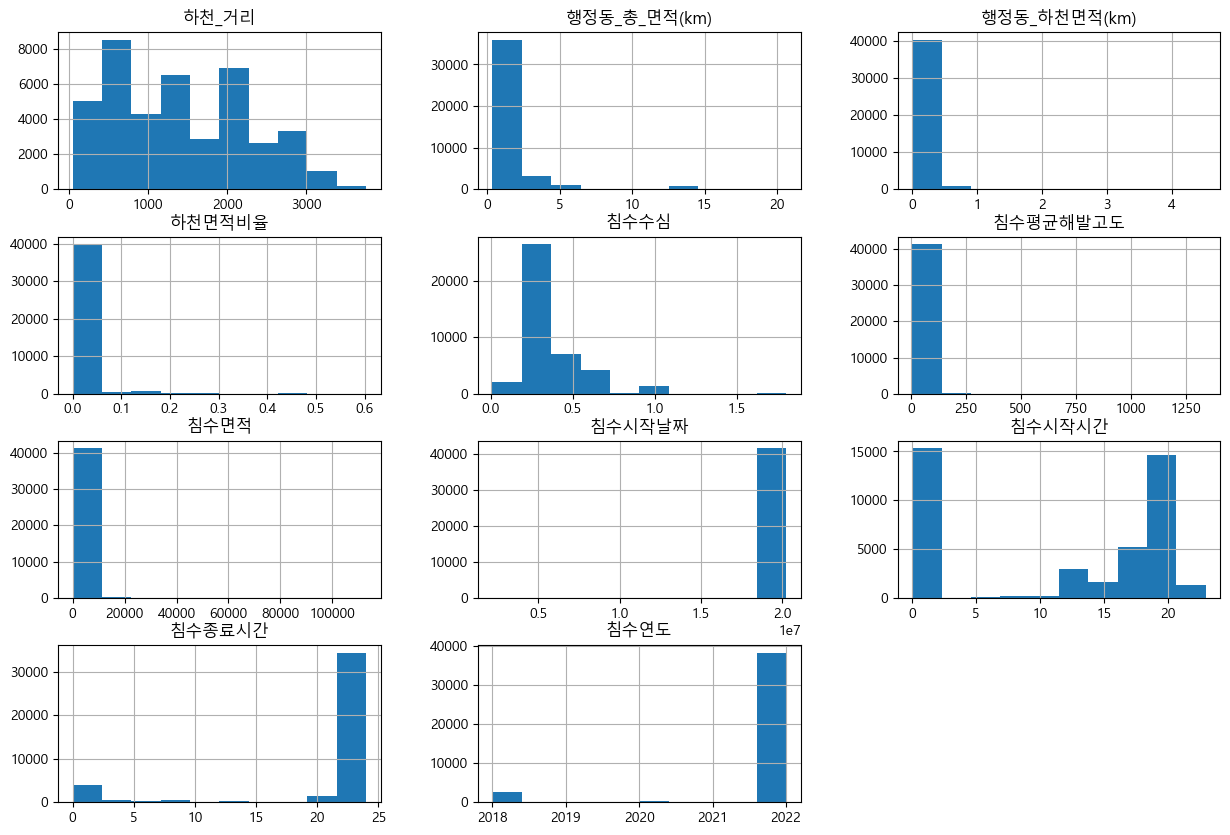

In [95]:
merged_df_river.hist(figsize=(15, 10))
plt.show()

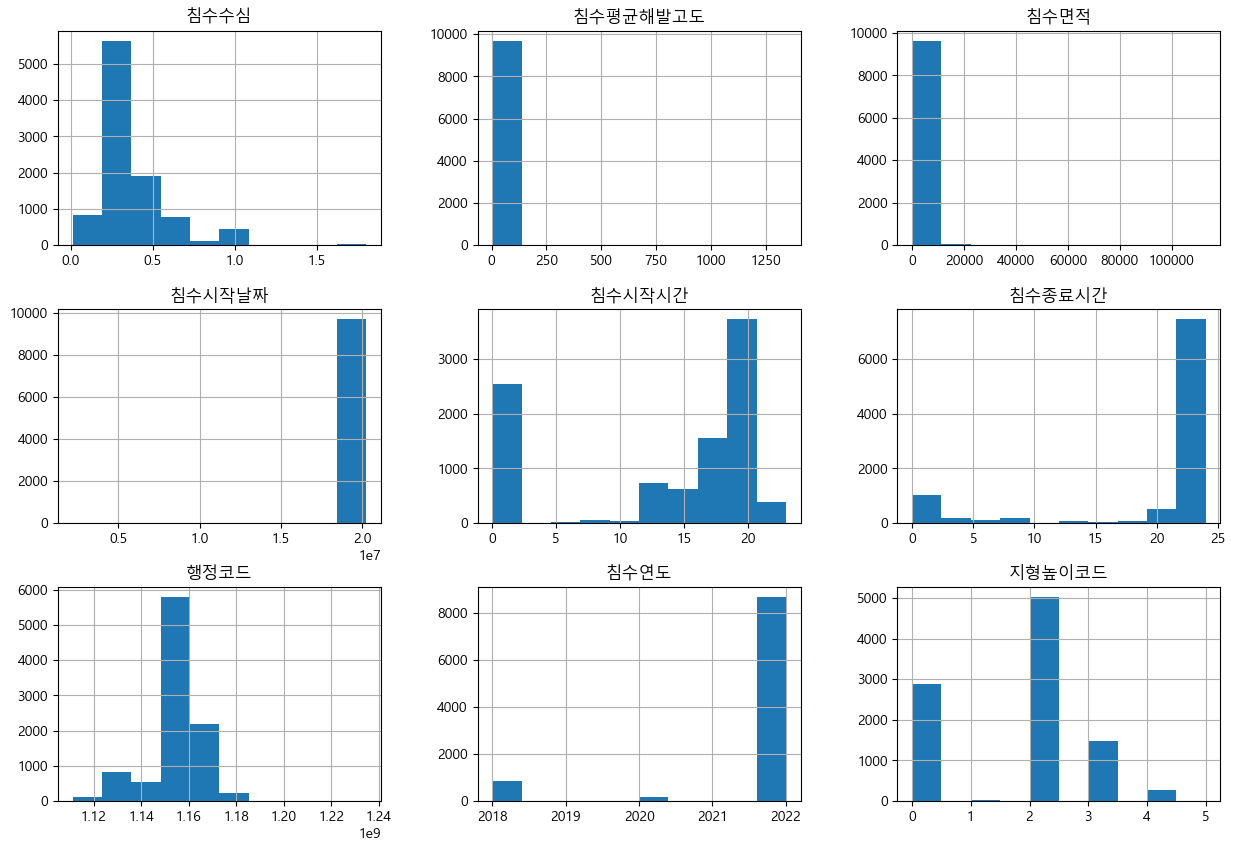

In [96]:
merged_df.hist(figsize=(15, 10))
plt.show()

In [97]:
# 자치구별 침수 발생 빈도 계산
gu_counts_river = merged_df_river['구단위'].value_counts()
gu_counts = merged_df['구단위'].value_counts()

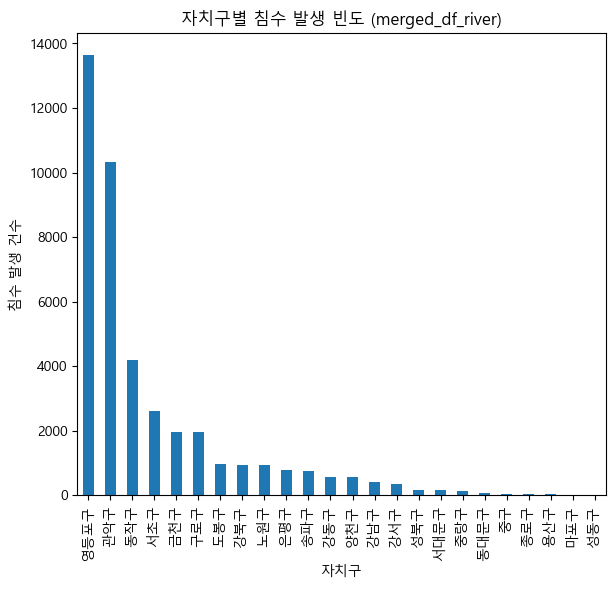

In [98]:
# 시각화
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
gu_counts_river.plot(kind='bar')
plt.title('자치구별 침수 발생 빈도 (merged_df_river)')
plt.xlabel('자치구')
plt.ylabel('침수 발생 건수')

plt.show()

In [99]:
# 영등포구 데이터 추출
yeongdeungpo_data = merged_df_river[merged_df_river['구단위'] == '영등포구']

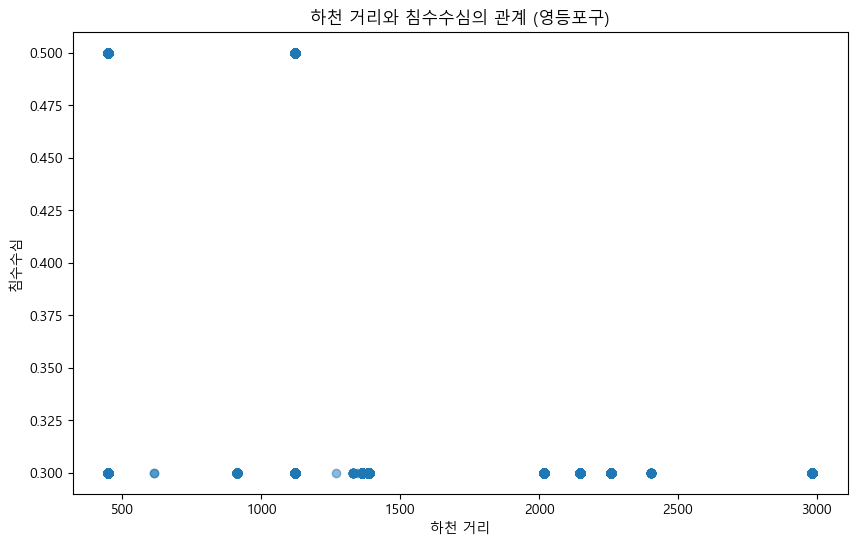

In [100]:
# 하천 거리와 침수 발생 빈도 간의 관계 시각화
plt.figure(figsize=(10, 6))
plt.scatter(yeongdeungpo_data['하천_거리'], yeongdeungpo_data['침수수심'], alpha=0.5)
plt.title('하천 거리와 침수수심의 관계 (영등포구)')
plt.xlabel('하천 거리')
plt.ylabel('침수수심')
plt.show()

In [101]:
# 하천 거리와 침수수심 간의 상관계수 계산
correlation = yeongdeungpo_data['하천_거리'].corr(yeongdeungpo_data['침수수심'])
print(f'하천 거리와 침수수심 간의 상관계수: {correlation}')

하천 거리와 침수수심 간의 상관계수: -0.44121717493131796


In [102]:
from scipy.stats import pearsonr

# 상관계수와 p-value 계산
correlation, p_value = pearsonr(yeongdeungpo_data['하천_거리'], yeongdeungpo_data['침수수심'])
print(f'상관계수: {correlation}, p-value: {p_value}')

상관계수: -0.44121717493133217, p-value: 0.0


구단위
강남구    -5.032405e-02
강동구    -1.855512e-01
강북구    -9.937852e-02
강서구    -7.327608e-01
관악구    -3.786532e-02
구로구    -1.504321e-01
금천구    -4.817790e-16
노원구              NaN
도봉구    -6.001269e-16
동대문구   -1.601584e-01
동작구    -8.970002e-02
마포구     1.691002e-01
서대문구    1.555318e-16
서초구     1.107128e-01
성동구              NaN
성북구    -4.527242e-16
송파구              NaN
양천구    -2.151191e-01
영등포구   -4.412172e-01
용산구    -9.172091e-17
은평구     1.324019e-16
종로구    -2.335581e-16
중구      4.907797e-16
중랑구     3.265070e-01
dtype: float64


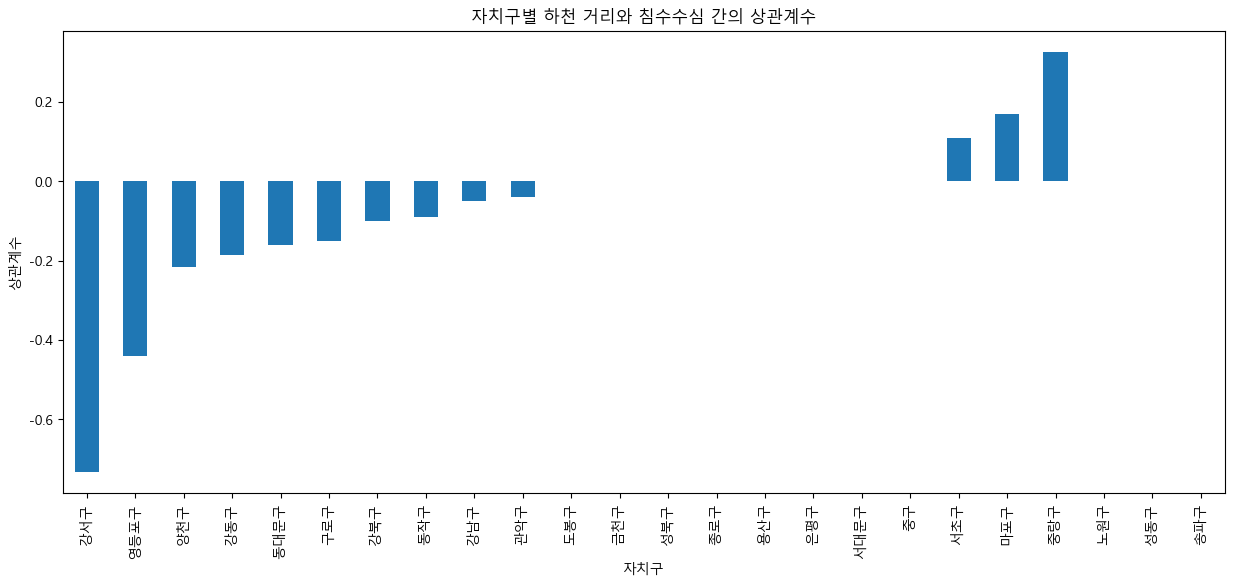

In [103]:
# 자치구별로 하천 거리와 침수수심 간의 상관계수를 계산
gu_corrs = merged_df_river.groupby('구단위').apply(lambda x: x['하천_거리'].corr(x['침수수심']))
print(gu_corrs)

# 자치구별 상관계수 시각화
plt.figure(figsize=(15, 6))
gu_corrs.sort_values().plot(kind='bar')
plt.title('자치구별 하천 거리와 침수수심 간의 상관계수')
plt.xlabel('자치구')
plt.ylabel('상관계수')
plt.show()

In [104]:
# 영등포구는 가장 많이 침수가 발생하는 지역이고 하천거리와에 상관관계도 높다.
# 반면 강서구는 하천 거리와에 상관계수가 높지만 침수가 적게 발생한다.

In [105]:
# !pip install statsmodels

In [106]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 데이터 로드
# merged_df_river_clean 데이터프레임을 사용한다고 가정합니다.

# 독립 변수와 종속 변수 설정
X = merged_df_river[['침수평균해발고도', '하천_거리', '하천면적비율']]
y = merged_df_river['침수수심']

# 상수항 추가
X = sm.add_constant(X)

# 데이터 분할 (훈련/테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 학습
model = sm.OLS(y_train, X_train).fit()

# 모델 평가
y_pred = model.predict(X_test)
model_summary = model.summary()

print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   침수수심   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     393.2
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          5.49e-251
Time:                        12:58:07   Log-Likelihood:                 8485.8
No. Observations:               33201   AIC:                        -1.696e+04
Df Residuals:                   33197   BIC:                        -1.693e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3350      0.002    141.292      0.0

In [107]:
# 모델의 설명력: R² 값이 매우 낮기 때문에, 이 모델은 침수수심을 예측하는 데 충분하지 않음을 알 수 있습니다. 따라서, 다른 변수를 추가적으로 고려할 필요가 있습니다.
# 유의미한 변수: 침수평균해발고도, 하천_거리, 하천면적비율은 모두 통계적으로 유의미한 변수로 나타났습니다.
# 다중공선성: 조건수가 매우 크므로 다중공선성 문제를 해결하기 위해 변수 선택을 재검토하거나 주성분 분석(PCA) 같은 방법을 사용할 필요가 있습니다.

In [123]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# 데이터 로드
# merged_df_river_clean 데이터프레임을 사용한다고 가정합니다.

# 독립 변수와 종속 변수 설정
X = merged_df_river[['침수평균해발고도', '하천_거리', '하천면적비율']]
y = merged_df_river['침수면적']

# 상수항 추가
X = sm.add_constant(X)

# 데이터 분할 (훈련/테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 학습
model = sm.OLS(y_train, X_train).fit()

# 모델 평가
y_pred = model.predict(X_test)
model_summary = model.summary()

print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   침수면적   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.571
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           0.000195
Time:                        13:44:18   Log-Likelihood:            -3.0717e+05
No. Observations:               33201   AIC:                         6.143e+05
Df Residuals:                   33197   BIC:                         6.144e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        442.2005     31.909     13.858      0.0

In [108]:
# 하천 거리와 침수수심 간의 상관계수 계산
correlation = yeongdeungpo_data['하천_거리'].corr(yeongdeungpo_data['침수평균해발고도'])
print(f'하천 거리와 침수평균해발고도 간의 상관계수: {correlation}')

하천 거리와 침수평균해발고도 간의 상관계수: 0.3369488072659026


In [128]:
yeongdeungpo_data = merged_df_river[merged_df_river['구단위'] == '영등포구']

# 영등포구에서 침수연도가 2022년인 데이터 필터링
yeongdeungpo_data[yeongdeungpo_data['침수연도'] == 2022]

,하천_거리,행정동_총_면적(km),행정동_하천면적(km),하천면적비율,행정코드,구단위,침수수심,침수원인,침수평균해발고도,침수면적,침수시작날짜,침수종료날짜,침수시작시간,침수종료시간,침수내용,주소,침수연도
9000,1329.431513,10.601797,4.527430,0.427044,1156011000,영등포구,0.3,2022년 8.8 ~17. 호우,13.74,33.00,20220808,20220810,20,24,내수침수,서울특별시 영등포구 여의도동 44-36,2022
9001,1329.431513,10.601797,4.527430,0.427044,1156011000,영등포구,0.3,2022년 8.8 ~17. 호우,13.50,36618.78,20220808,20220810,20,24,내수침수,서울특별시 영등포구여의도동 5,2022
9002,1329.431513,10.601797,4.527430,0.427044,1156011000,영등포구,0.3,2022년 8.8 ~17. 호우,13.38,33.00,20220808,20220810,20,24,내수침수,서울특별시 영등포구 여의도동 50,2022
9003,1329.431513,10.601797,4.527430,0.427044,1156011000,영등포구,0.3,2022년 8.8 ~17. 호우,13.73,33.00,20220808,20220810,20,24,내수침수,서울특별시 영등포구 여의도동 35-2,2022
9004,1329.431513,10.601797,4.527430,0.427044,1156011000,영등포구,0.3,2022년 8.8 ~17. 호우,13.06,33.00,20220808,20220810,20,24,내수침수,서울특별시 영등포구 여의도동 41-2,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22637,910.646548,0.875280,0.000000,0.000000,1156011800,영등포구,0.3,2022년 8.8 ~17. 호우,10.50,383.23,20220808,20220810,20,24,내수침수,서울특별시 영등포구도림동 253-79,2022
22638,910.646548,0.875280,0.000000,0.000000,1156011800,영등포구,0.3,2022년 8.8 ~17. 호우,10.36,120.00,20220808,20220810,20,24,내수침수,서울특별시 영등포구 도림동 253-70,2022
22639,910.646548,0.875280,0.000000,0.000000,1156011800,영등포구,0.3,2022년 8.8 ~17. 호우,10.50,206.00,20220808,20220810,20,24,내수침수,서울특별시 영등포구 도림동 253-114,2022
22640,614.934751,2.775210,0.055146,0.019871,1156012400,영등포구,0.3,2022년 8.8 ~17. 호우,8.50,2310.71,20220808,20220810,20,24,내수침수,서울특별시 영등포구문래동6가 33-2,2022


In [129]:
# 데이터의 침수연도 분포 확인
year_counts = merged_df_river['침수연도'].value_counts()
print(year_counts)

침수연도
2022    38380
2018     2674
2020      431
2019       17
Name: count, dtype: int64


In [130]:
# 데이터의 '구단위'와 '침수연도'를 기준으로 그룹화하여 확인
grouped_data = merged_df_river.groupby(['구단위', '침수연도']).size().unstack(fill_value=0)
print(grouped_data)

침수연도  2018  2019  2020   2022
구단위                          
강남구     14     4     0    397
강동구     23     0   242    293
강북구    327     5    30    580
강서구    208     0     0    138
관악구      0     0     0  10330
구로구      0     6     0   1941
금천구      0     0     0   1963
노원구    302     0    93    532
도봉구    519     2    15    430
동대문구    26     0    14     31
동작구      0     0     9   4193
마포구      2     0     1      8
서대문구   103     0     8     33
서초구      0     0    15   2590
성동구      0     0     0      8
성북구     63     0     4     95
송파구      0     0     0    750
양천구    469     0     0     83
영등포구     0     0     0  13642
용산구      0     0     0     18
은평구    618     0     0    159
종로구      0     0     0     24
중구       0     0     0     26
중랑구      0     0     0    116


In [109]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9682 entries, 0 to 9681
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구단위       9682 non-null   object 
 1   침수수심      9682 non-null   float64
 2   침수원인      9682 non-null   object 
 3   침수평균해발고도  9682 non-null   float64
 4   침수면적      9682 non-null   float64
 5   침수시작날짜    9682 non-null   int64  
 6   침수종료날짜    9682 non-null   object 
 7   침수시작시간    9682 non-null   int64  
 8   침수종료시간    9682 non-null   int64  
 9   침수내용      9682 non-null   object 
 10  주소        9682 non-null   object 
 11  행정코드      9682 non-null   int64  
 12  침수연도      9682 non-null   int64  
 13  법정동명      9680 non-null   object 
 14  지형높이코드    9680 non-null   float64
 15  지형높이      9680 non-null   object 
dtypes: float64(4), int64(5), object(7)
memory usage: 1.2+ MB


In [110]:
# 기초 통계량 확인
merged_df.describe()

,침수수심,침수평균해발고도,침수면적,침수시작날짜,침수시작시간,침수종료시간,행정코드,침수연도,지형높이코드
count,9682.000000,9682.000000,9682.000000,9.682000e+03,9682.000000,9682.000000,9.682000e+03,9682.000000,9680.000000
mean,0.387775,21.039540,610.079647,2.021511e+07,13.628279,20.115679,1.155122e+09,2021.615988,1.608884
std,0.209593,22.582195,2907.107263,1.836580e+05,8.128215,7.941414,1.064147e+07,1.148163,1.143547
min,0.010000,3.370000,0.210000,2.180828e+06,0.000000,0.000000,1.111010e+09,2018.000000,0.000000
25%,0.300000,12.300000,103.000000,2.022081e+07,1.000000,23.000000,1.154510e+09,2022.000000,0.000000
50%,0.300000,16.265000,148.800000,2.022081e+07,18.000000,24.000000,1.156013e+09,2022.000000,2.000000
75%,0.500000,23.850000,274.725000,2.022081e+07,20.000000,24.000000,1.159011e+09,2022.000000,2.000000
max,1.800000,1341.660000,113020.000000,2.022123e+07,23.000000,24.000000,1.234568e+09,2022.000000,5.000000


In [111]:
# 결측치 확인
print(merged_df.isnull().sum())

구단위         0
침수수심        0
침수원인        0
침수평균해발고도    0
침수면적        0
침수시작날짜      0
침수종료날짜      0
침수시작시간      0
침수종료시간      0
침수내용        0
주소          0
행정코드        0
침수연도        0
법정동명        2
지형높이코드      2
지형높이        2
dtype: int64


In [112]:
# 범주형 변수의 값 분포 확인
for column in merged_df.select_dtypes(include=['object']).columns:
    print(merged_df[column].value_counts())
    print()

구단위
영등포구    3463
동작구     1239
관악구     1002
서초구      616
구로구      508
금천구      478
은평구      372
송파구      361
도봉구      311
강북구      257
강동구      230
강남구      208
노원구      143
성북구       91
강서구       90
양천구       81
서대문구      80
동대문구      39
중랑구       30
용산구       29
종로구       23
마포구       17
중구        10
성동구        4
Name: count, dtype: int64

침수원인
2022년 8.8 ~17. 호우           8175
2018년 8.26~9.1 호우            842
2022년 8월 집중호우                445
2020년 8.22~8.31 호우           105
2020년 7.28~8.11 호우            55
2022년 9.3~7. 제11호 태풍 힌남노      31
2022년 6.28~7.1호우              17
2020년 8.14 호우                  5
2019년 제13호 태풍 링링               3
2019년 9.10.~ 호우                2
2020년 8.14~ 호우                 1
2019년 9.10. 호우                 1
Name: count, dtype: int64

침수종료날짜
20220810      7025
20180901       620
20220817       449
2022-08-11     394
20220809       362
20220808       315
20180830       187
20200831       105
20220811        50
20200811        47
20180829        35
20220905     

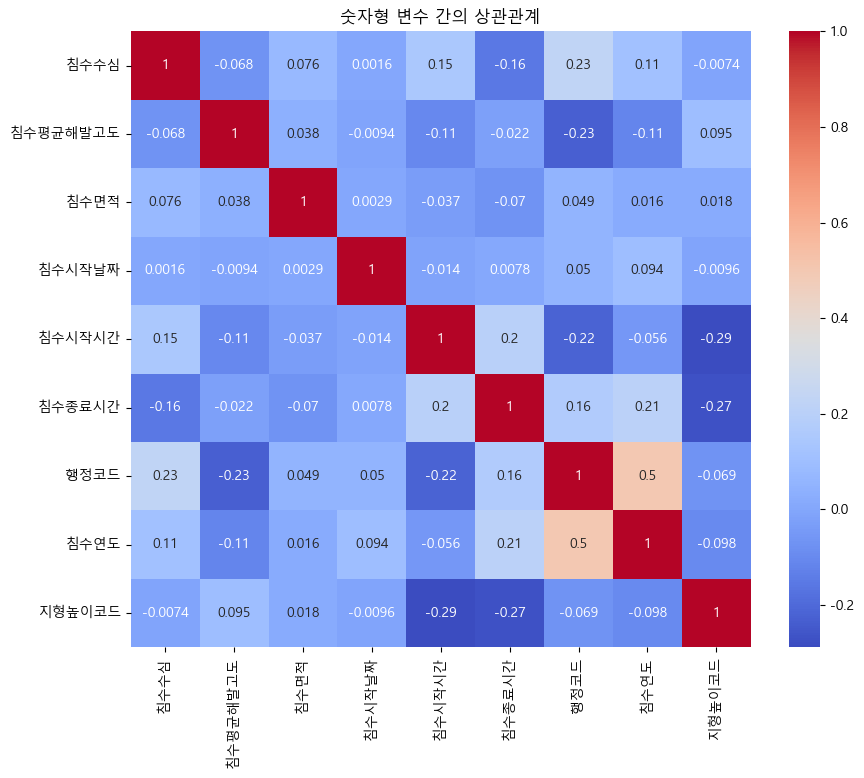

In [113]:
# 숫자형 변수만 선택
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])

# 숫자형 변수 간의 상관관계 행렬
corr_matrix = numeric_df.corr()

# 상관관계 행렬 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('숫자형 변수 간의 상관관계')
plt.show()



In [118]:
merged_df[['지형높이코드', '지형높이']].drop_duplicates()

,지형높이코드,지형높이
0,2.0,평지
12,0.0,지정되지않음
29,3.0,완경사
117,4.0,급경사
176,1.0,저지
1089,NaN,NaN
7818,5.0,고지


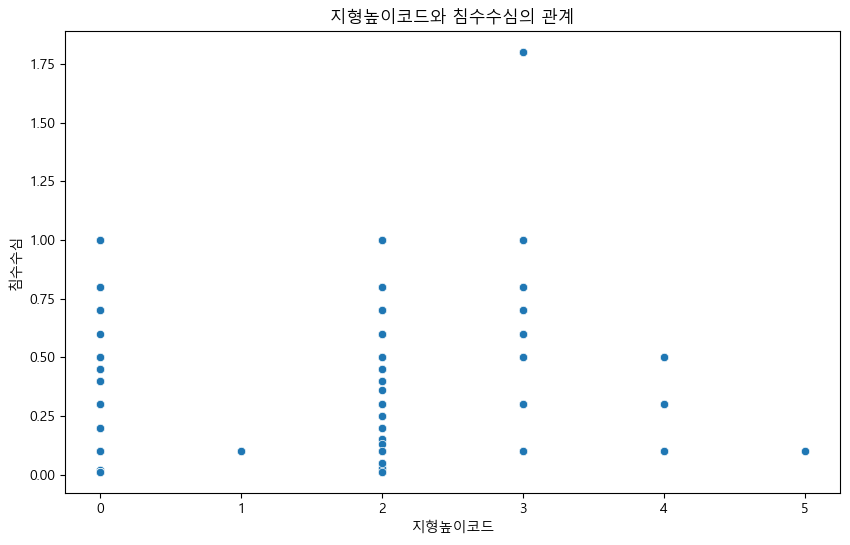

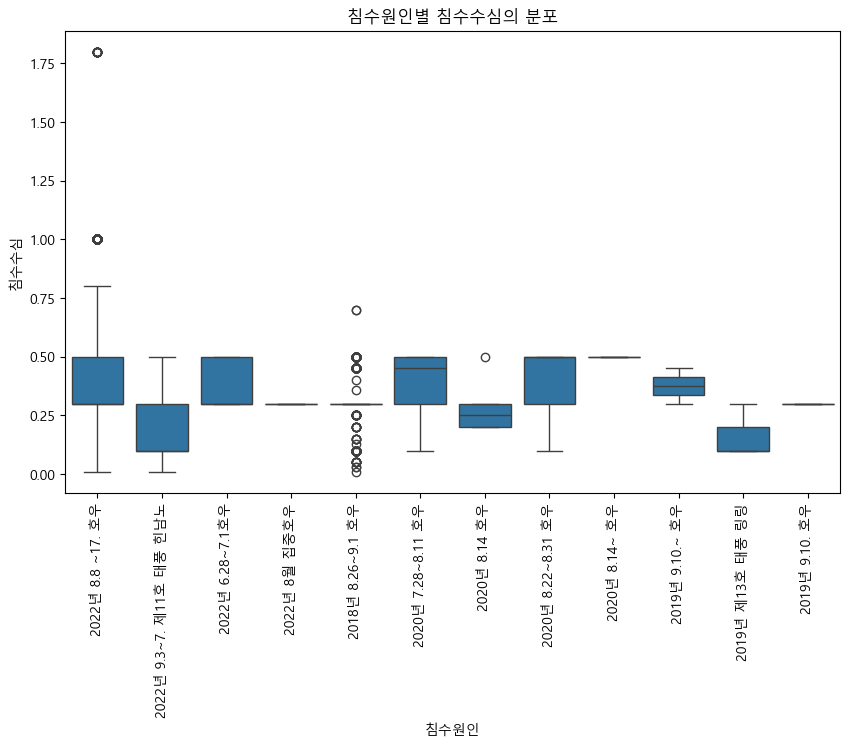

In [114]:
# 침수수심과 다른 변수 간의 관계 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='지형높이코드', y='침수수심', data=merged_df)
plt.title('지형높이코드와 침수수심의 관계')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='침수원인', y='침수수심', data=merged_df)
plt.title('침수원인별 침수수심의 분포')
plt.xticks(rotation=90)
plt.show()


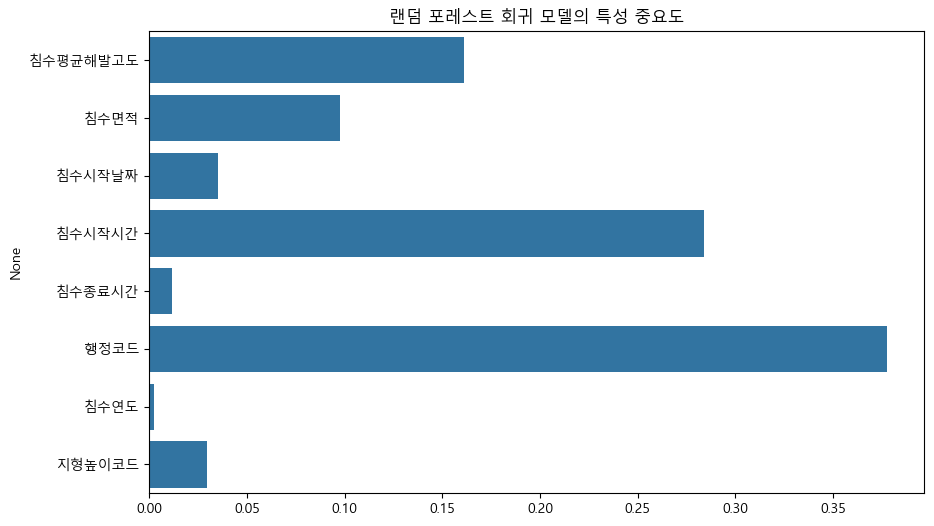

In [119]:
# 비선형 관계 분석 (랜덤 포레스트 회귀)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 독립 변수와 종속 변수 설정
X = numeric_df.drop(columns=['침수수심'])
y = numeric_df['침수수심']

# 데이터 분할 (훈련/테스트 세트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 학습
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 특성 중요도 확인
importances = model.feature_importances_
feature_names = X.columns

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('랜덤 포레스트 회귀 모델의 특성 중요도')
plt.show()


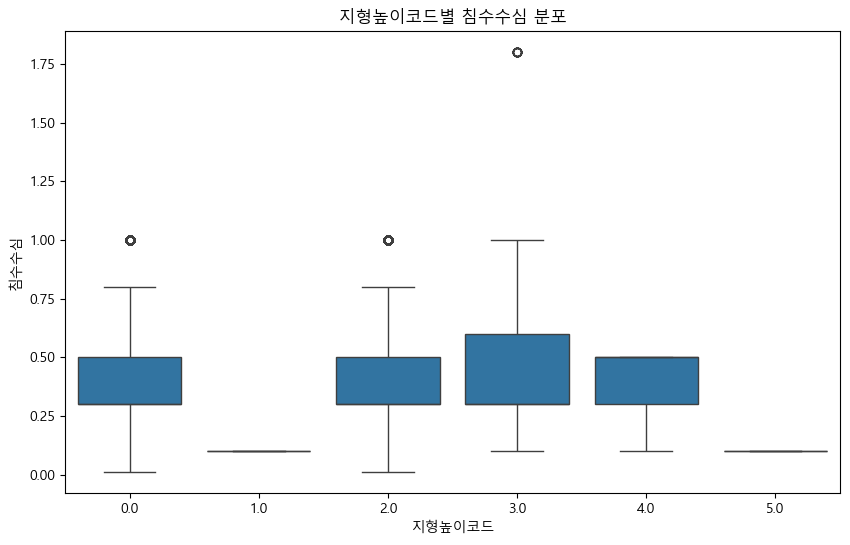

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# 지형높이코드별 침수수심 분포 박스플롯
plt.figure(figsize=(10, 6))
sns.boxplot(x='지형높이코드', y='침수수심', data=merged_df)
plt.title('지형높이코드별 침수수심 분포')
plt.xlabel('지형높이코드')
plt.ylabel('침수수심')
plt.show()

In [122]:
# 침수수심에 대한 다중선형회귀 분석
import numpy as np
import pandas as pd
import statsmodels.api as sm

# NaN 및 무한대 값 제거
merged_df = merged_df.replace([np.inf, -np.inf], np.nan)
merged_df = merged_df.dropna(subset=['침수평균해발고도', '지형높이코드', '침수면적', '행정코드', '침수수심'])

# 독립 변수와 종속 변수 설정
X = merged_df[['침수평균해발고도', '지형높이코드', '침수면적', '행정코드']]
y = merged_df['침수수심']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 학습
model = sm.OLS(y, X).fit()

# 모델 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   침수수심   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     146.9
Date:                Tue, 06 Aug 2024   Prob (F-statistic):          3.73e-122
Time:                        13:21:02   Log-Likelihood:                 1676.6
No. Observations:                9680   AIC:                            -3343.
Df Residuals:                    9675   BIC:                            -3307.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6820      0.233    -20.113      0.0

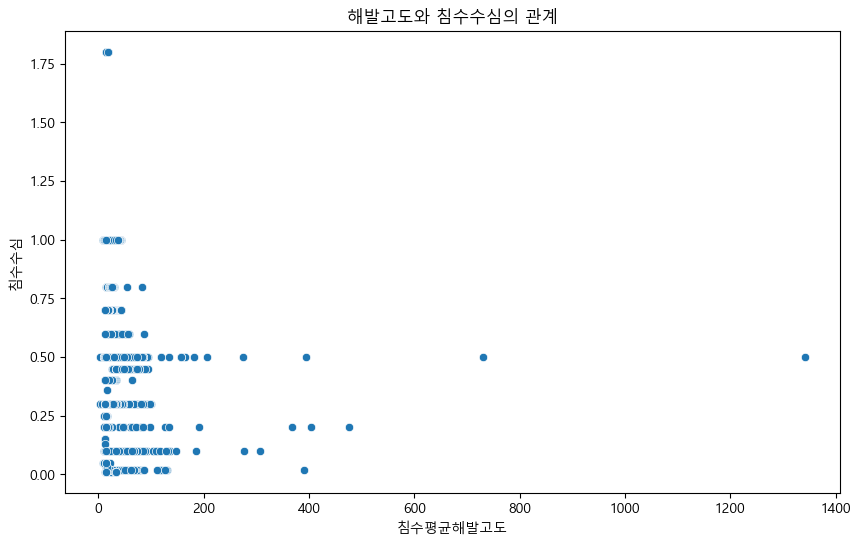

In [133]:
# 지형 특성과의 관계 분석
plt.figure(figsize=(10, 6))
sns.scatterplot(x='침수평균해발고도', y='침수수심', data=merged_df)
plt.title('해발고도와 침수수심의 관계')
plt.show()

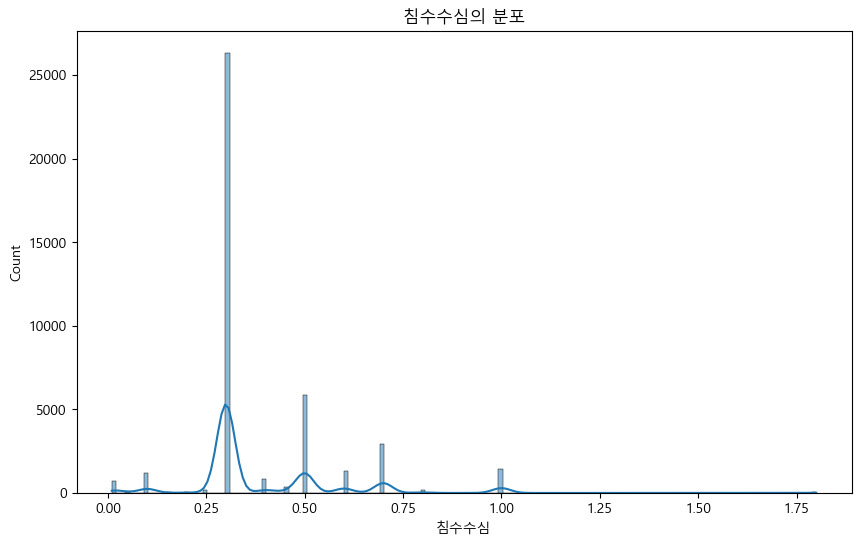

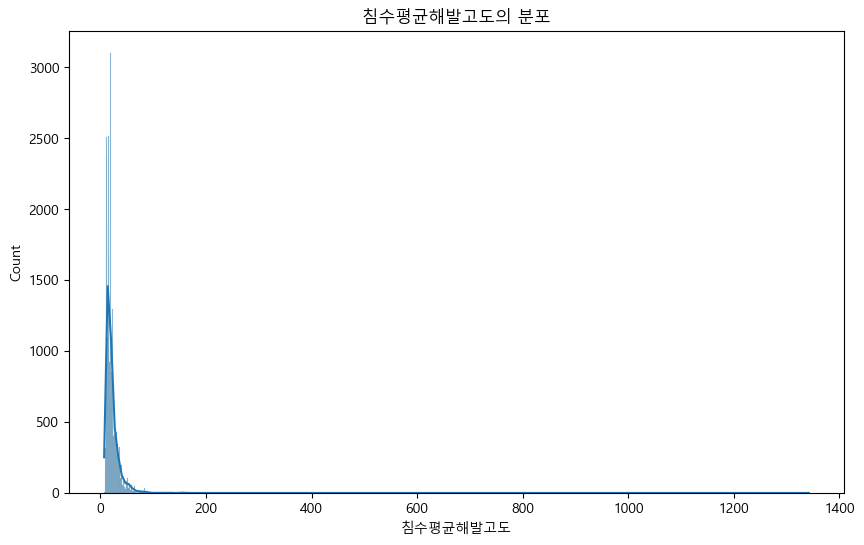

In [134]:
# 침수수심의 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(merged_df_river['침수수심'], kde=True)
plt.title('침수수심의 분포')
plt.show()

# 침수평균해발고도의 분포 확인
plt.figure(figsize=(10, 6))
sns.histplot(merged_df_river['침수평균해발고도'], kde=True)
plt.title('침수평균해발고도의 분포')
plt.show()

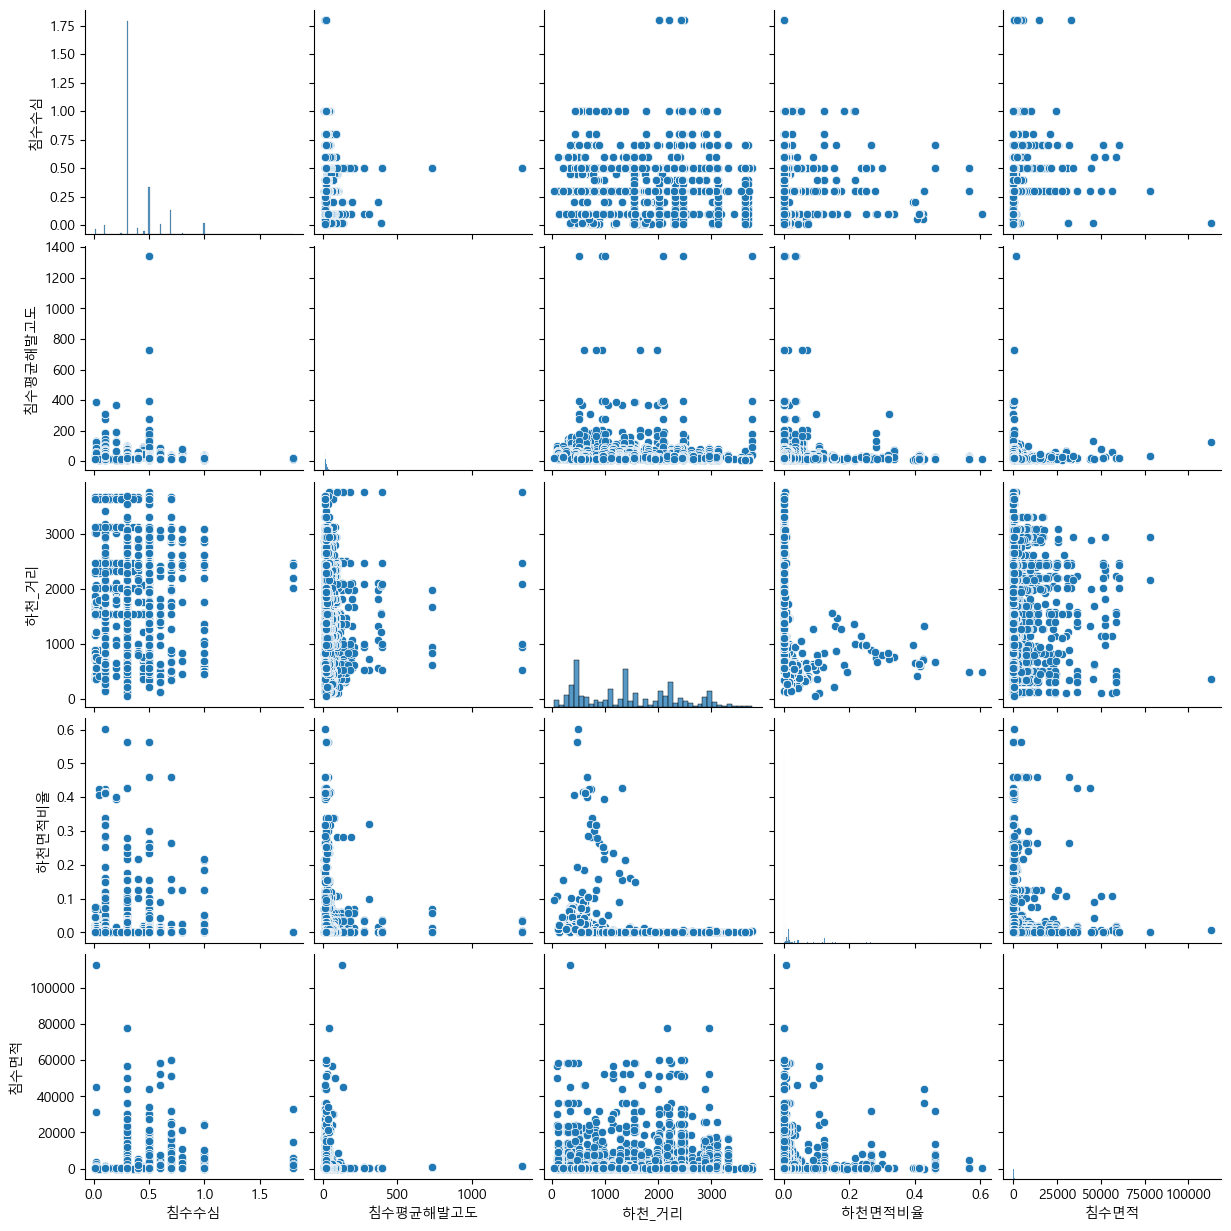

In [136]:
# 다중 변수 간의 관계 분석 (pairplot)
sns.pairplot(merged_df_river[['침수수심', '침수평균해발고도', '하천_거리', '하천면적비율', '침수면적']])
plt.show()

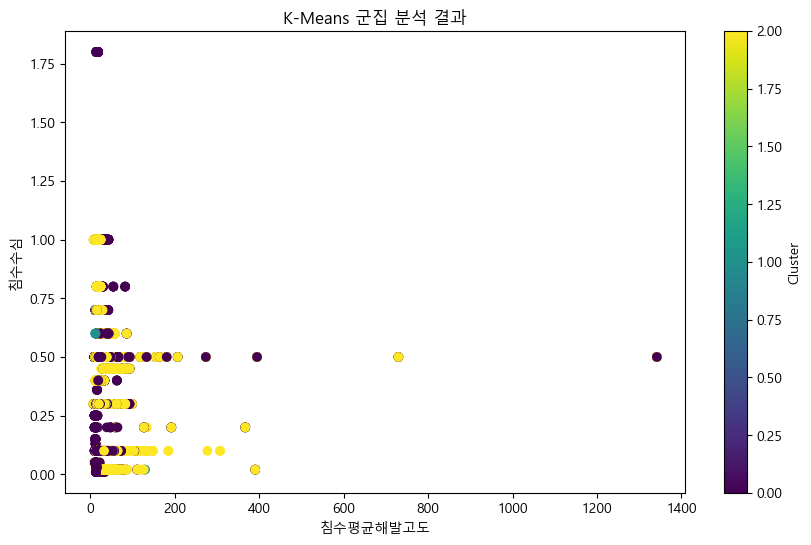

In [139]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 데이터 준비
X = merged_df_river[['침수평균해발고도', '하천_거리', '하천면적비율', '침수면적', '침수수심']].dropna()

# K-Means 군집 분석
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X[['침수평균해발고도', '하천_거리', '하천면적비율', '침수면적']])

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X['침수평균해발고도'], X['침수수심'], c=clusters, cmap='viridis')
plt.title('K-Means 군집 분석 결과')
plt.xlabel('침수평균해발고도')
plt.ylabel('침수수심')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# 해발고도가 낮은 지역에서 침수가 빈번하게 발생하는 경향이 있습니다.
# 고도가 높은 지역에서도 침수가 발생할 수 있지만, 이는 상대적으로 적습니다.
# 군집 0에 속한 지역들은 침수 위험이 높을 가능성이 있습니다. 특히 해발고도가 낮은 지역은 더 많은 주의가 필요합니다.
# 군집 1에 속한 지역들은 다양한 고도를 가지지만, 주로 평지와 저지대에서 발생한 침수 사건을 포함합니다.

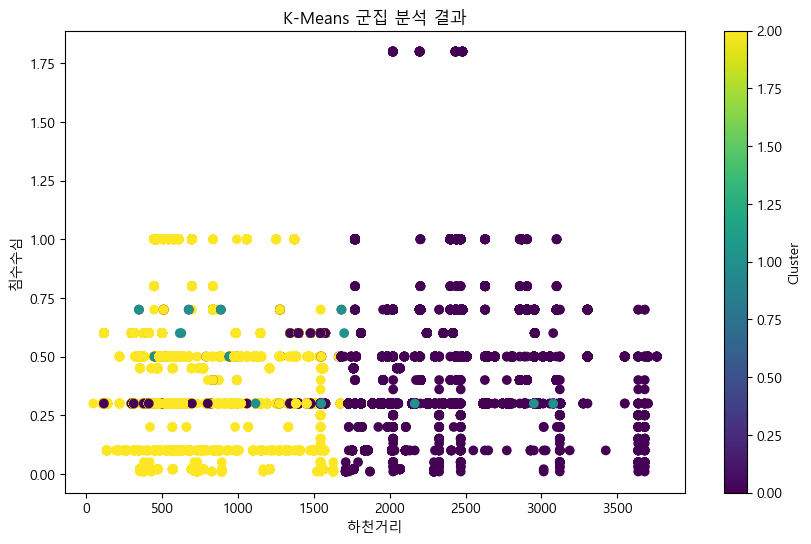

In [140]:
# # 결과 시각화
# plt.figure(figsize=(10, 6))
# plt.scatter(X['하천_거리'], X['침수수심'], c=clusters, cmap='viridis')
# plt.title('K-Means 군집 분석 결과')
# plt.xlabel('하천거리')
# plt.ylabel('침수수심')
# plt.colorbar(label='Cluster')
# plt.show()

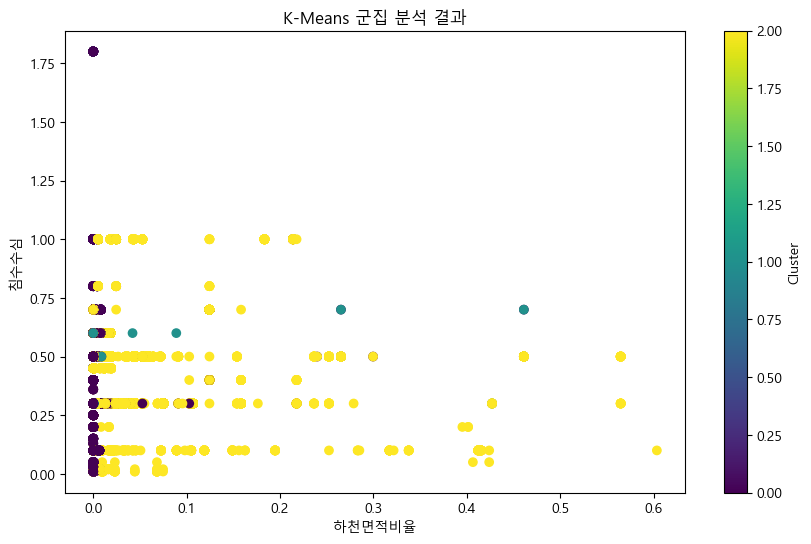

In [141]:
# # 결과 시각화
# plt.figure(figsize=(10, 6))
# plt.scatter(X['하천면적비율'], X['침수수심'], c=clusters, cmap='viridis')
# plt.title('K-Means 군집 분석 결과')
# plt.xlabel('하천면적비율')
# plt.ylabel('침수수심')
# plt.colorbar(label='Cluster')
# plt.show()

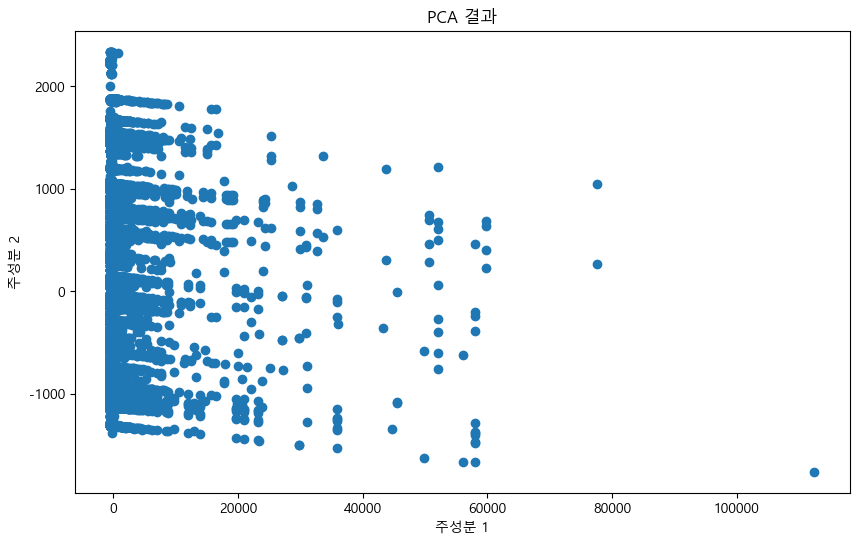

In [142]:
from sklearn.decomposition import PCA

# 데이터 준비
X = merged_df_river[['침수평균해발고도', '하천_거리', '하천면적비율', '침수면적']].dropna()

# PCA 적용
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('PCA 결과')
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.show()


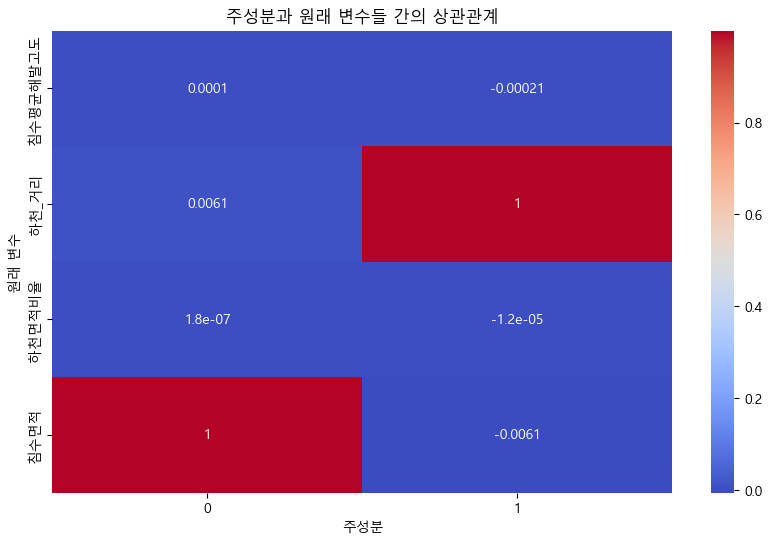

In [143]:
# 주성분과 원래 변수들 간의 상관관계 시각화
components = pd.DataFrame(pca.components_, columns=['침수평균해발고도', '하천_거리', '하천면적비율', '침수면적'])
plt.figure(figsize=(10, 6))
sns.heatmap(components.T, annot=True, cmap='coolwarm', cbar=True)
plt.title('주성분과 원래 변수들 간의 상관관계')
plt.xlabel('주성분')
plt.ylabel('원래 변수')
plt.show()

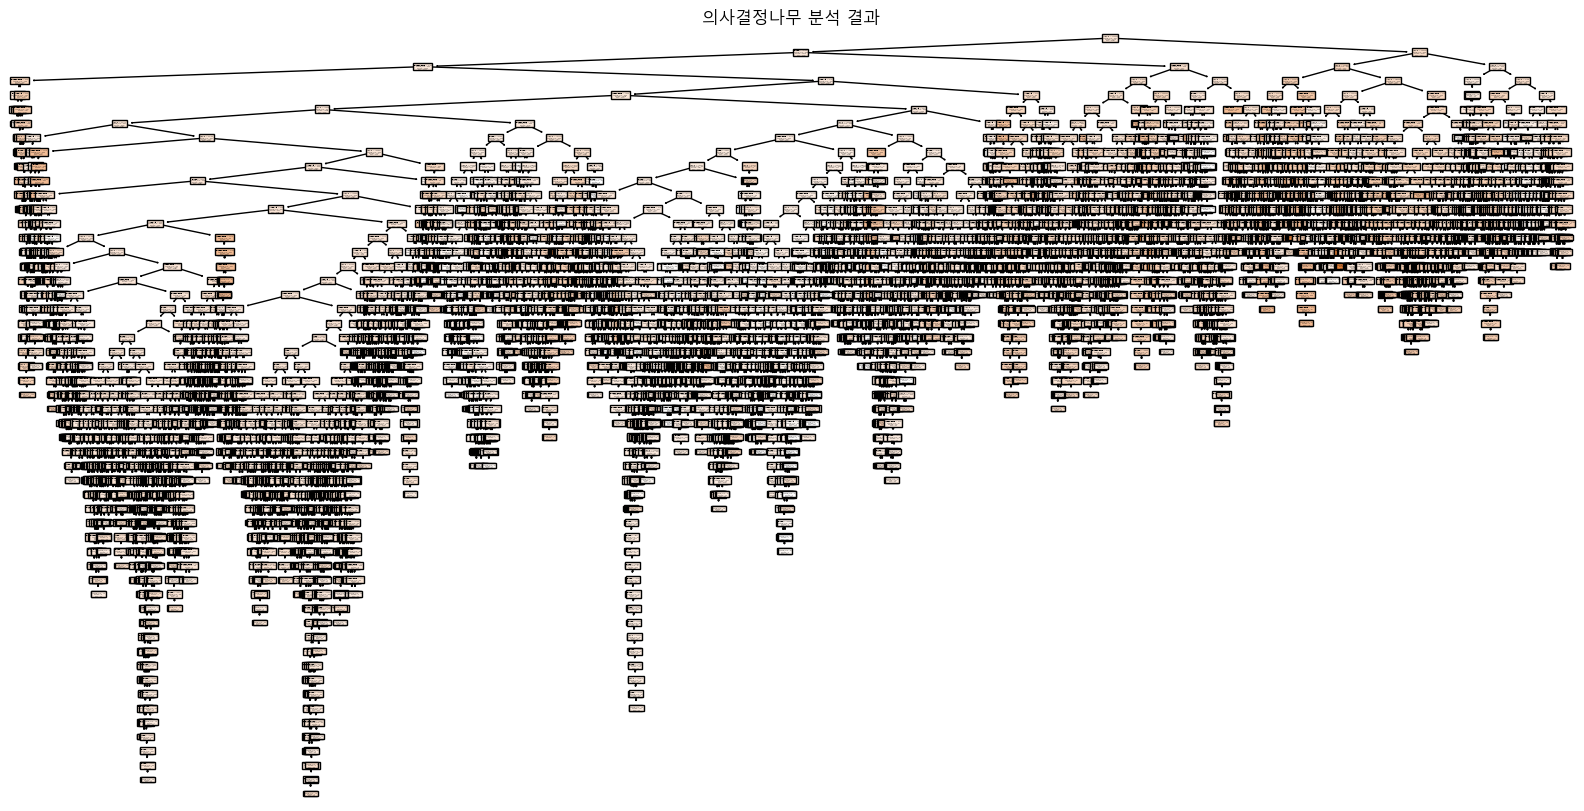

In [144]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import plot_tree

# # 데이터 준비
# X = merged_df_river[['침수평균해발고도', '하천_거리', '하천면적비율', '침수면적']].dropna()
# y = merged_df_river['침수수심'].dropna()

# # 의사결정나무 모델 학습
# tree_model = DecisionTreeRegressor(random_state=42)
# tree_model.fit(X, y)

# # 의사결정나무 시각화
# plt.figure(figsize=(20, 10))
# plot_tree(tree_model, feature_names=X.columns, filled=True)
# plt.title('의사결정나무 분석 결과')
# plt.show()


In [145]:
# # 변수 중요도 확인
# feature_importance = tree_model.feature_importances_
# importance_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': feature_importance
# }).sort_values(by='Importance', ascending=False)

# print(importance_df)

    Feature  Importance
1     하천_거리    0.445778
0  침수평균해발고도    0.265171
3      침수면적    0.168873
2    하천면적비율    0.120178


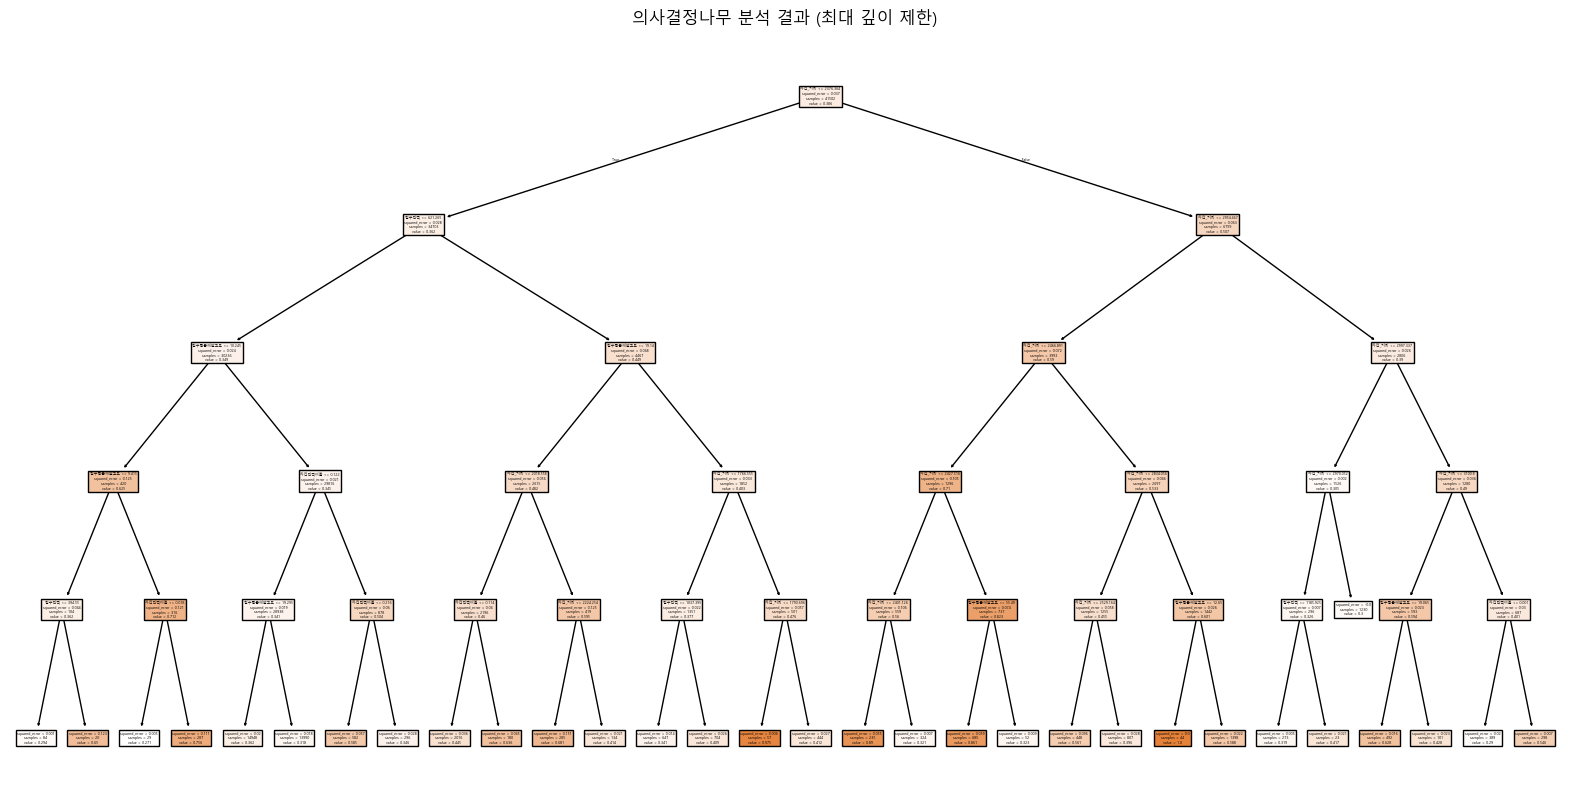

In [146]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 데이터 준비
X = merged_df_river[['침수평균해발고도', '하천_거리', '하천면적비율', '침수면적']].dropna()
y = merged_df_river['침수수심'].dropna()

# 의사결정나무 모델 학습 (최대 깊이 제한)
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X, y)

# 의사결정나무 시각화
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True)
plt.title('의사결정나무 분석 결과 (최대 깊이 제한)')
plt.show()

In [147]:
import pandas as pd

# 변수 중요도 확인
feature_importance = tree_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

    Feature  Importance
1     하천_거리    0.663623
0  침수평균해발고도    0.156836
2    하천면적비율    0.102788
3      침수면적    0.076754


In [148]:
# 침수면적과 하천_거리는 주요 분기 기준으로 사용 이는 이 두 변수가 침수수심 예측에 중요한 역할을 하고 있음을 시사
# 침수면적이 낮은 지역에서는 하천_거리가 침수수심 예측에 중요한 역할
# 침수면적이 높은 지역에서는 다른 변수들 (예: 침수평균해발고도, 하천면적비율)이 중요

In [152]:
# 변수 선택 및 결측값 제거
X = merged_df[['침수평균해발고도', '침수면적', '지형높이코드']].dropna()
y = merged_df['침수수심'].dropna()

# 독립 변수와 종속 변수 크기 맞추기 (결측값이 없는 행만 사용)
merged_data = merged_df[['침수평균해발고도', '침수면적', '지형높이코드', '침수수심']].dropna()
X = merged_data[['침수평균해발고도', '침수면적', '지형높이코드']]
y = merged_data['침수수심']

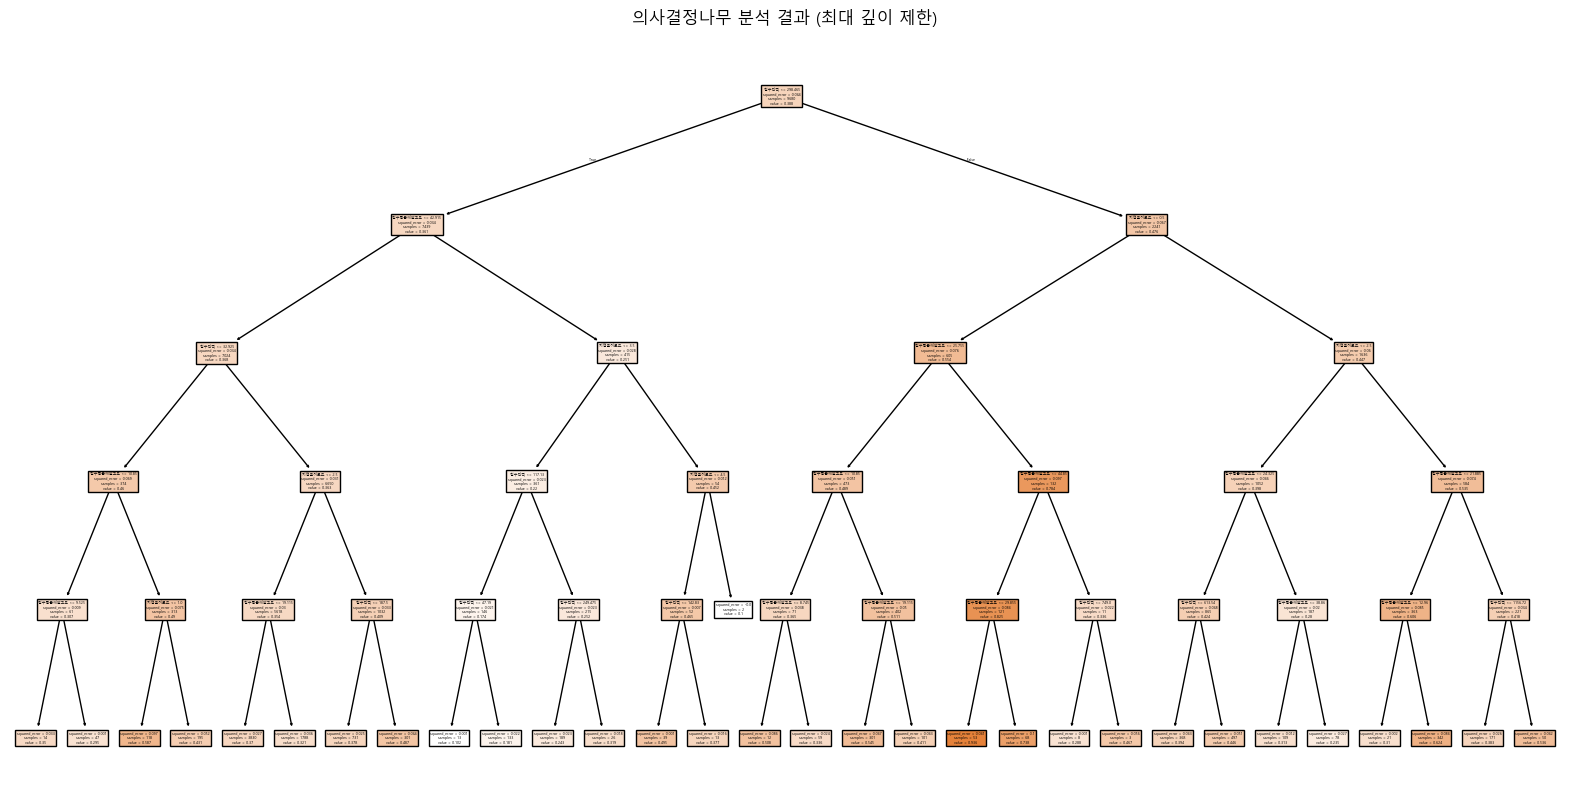

In [153]:
# 의사결정나무 모델 학습 및 시각화
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X, y)

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True)
plt.title('의사결정나무 분석 결과 (최대 깊이 제한)')
plt.show()

In [154]:
# 변수 중요도 확인
feature_importance = tree_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

    Feature  Importance
0  침수평균해발고도    0.416213
1      침수면적    0.360002
2    지형높이코드    0.223785


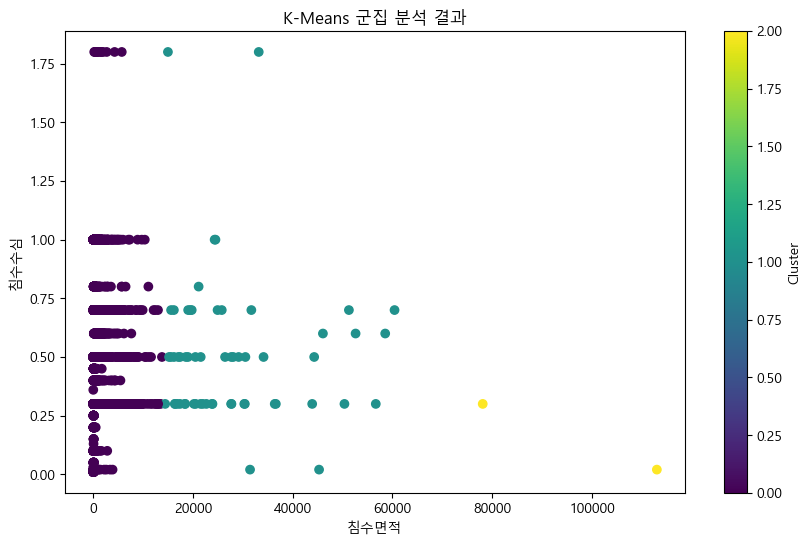

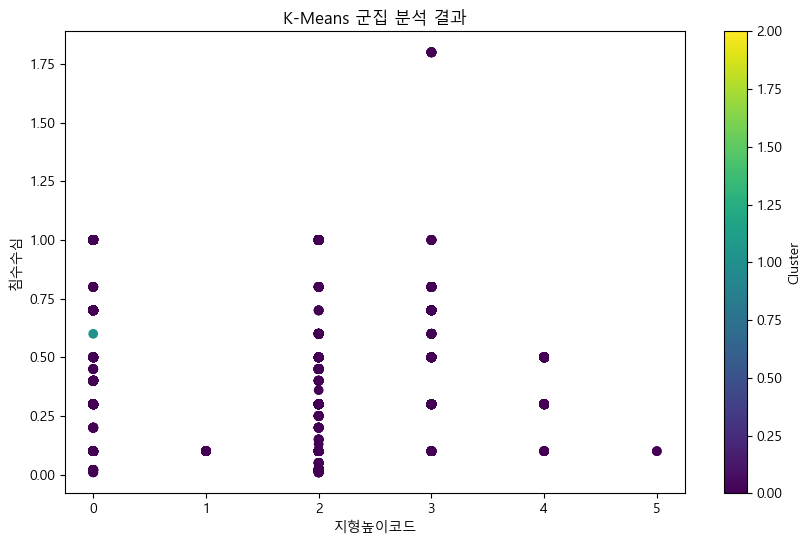

In [155]:
# K-Means 군집 분석 및 시각화
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X['침수면적'], y, c=clusters, cmap='viridis')
plt.title('K-Means 군집 분석 결과')
plt.xlabel('침수면적')
plt.ylabel('침수수심')
plt.colorbar(label='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X['지형높이코드'], y, c=clusters, cmap='viridis')
plt.title('K-Means 군집 분석 결과')
plt.xlabel('지형높이코드')
plt.ylabel('침수수심')
plt.colorbar(label='Cluster')
plt.show()


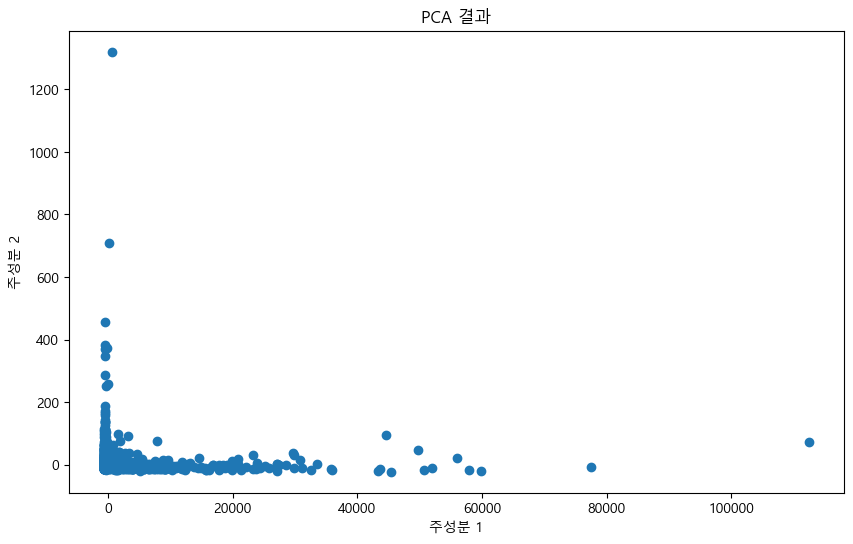

주성분 1이 설명하는 변동: 99.99%
주성분 2가 설명하는 변동: 0.01%


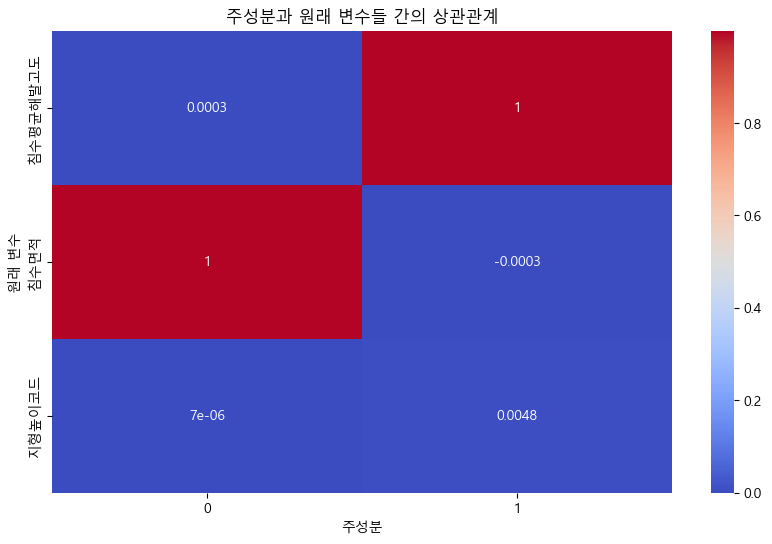

In [156]:
# 주성분 분석(PCA) 및 시각화
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('PCA 결과')
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.show()

# PCA 기여도 확인
explained_variance = pca.explained_variance_ratio_
print(f"주성분 1이 설명하는 변동: {explained_variance[0] * 100:.2f}%")
print(f"주성분 2가 설명하는 변동: {explained_variance[1] * 100:.2f}%")

# 주성분과 원래 변수들 간의 상관관계 시각화
components = pd.DataFrame(pca.components_, columns=['침수평균해발고도', '침수면적', '지형높이코드'])
plt.figure(figsize=(10, 6))
sns.heatmap(components.T, annot=True, cmap='coolwarm', cbar=True)
plt.title('주성분과 원래 변수들 간의 상관관계')
plt.xlabel('주성분')
plt.ylabel('원래 변수')
plt.show()